In [1]:
from _HyperSBM import *
from _HyperCommunityDetection import *
from _FigureJiazeHelper import *
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Circle
from scipy.sparse.linalg import eigs, eigsh
from scipy.linalg import eig
from scipy.special import comb
from _CommunityDetect import *
from spectralOperator import BetheHessian
# from EXPERIMENT_2orderHYPERGRAPH import *
from EXPERIMENT_HYPER import *
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

 No module named 'igraph'. If you need to use hypernetx.algorithms.hypergraph_modularity, please install additional packages by running the following command: pip install .['all']


In [2]:
# Matplotlib settings

# plt.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(8, 5))
plt.rc('font', size=16)
plt.rc('font', family='sans-serif')
plt.rcParams['font.sans-serif'] = 'verdana'
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = basic_line_color
plt.rcParams['xtick.color'] = basic_line_color
plt.rcParams['ytick.color'] = basic_line_color
plt.rcParams['axes.labelsize'] = 'large'
plt.rcParams['lines.markersize'] = 12

%config InlineBackend.figure_format = 'retina'

# Code Test

(479, 479)
# of nodes 50, # of edges 429


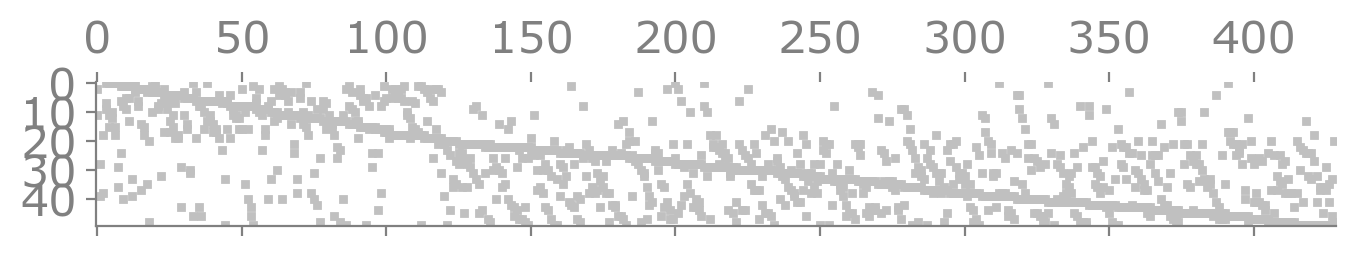

In [20]:
sizes = [20, 30]
ps_dict = {2:[[0.001, 0.001], [0.001, 0.001]], 3:[[[0.01, 0.001], [0.002, 0.001]], [[0.001, 0.001], [0.002, 0.01]]]}
hsbm = HyperSBM(sizes, ps_dict)
print(f'# of nodes {hsbm.n}, # of edges {hsbm.e}')
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=2, rasterized=True, color=gray)

In [21]:
start = time.time()
cd = CommunityDetect(hsbm.bipartite_A)
BHpartition, BHnumgroups = cd.BetheHessian()
true_numberpartition = np.size(sizes)
node_partition = BHpartition[:hsbm.n]
node_numberpartition = np.size(np.unique(node_partition))
Acm, _ = get_confusionmatrix(hsbm.groupId, node_partition, true_numberpartition, node_numberpartition)
ami = adjusted_mutual_info_score(hsbm.groupId, node_partition)
print(f"BH result in A: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(Acm)}) is: \n{Acm}")

number of groups = 4, Kpos=2, Kneg=2
True index is [0 1], Community detected index is [0 1]
BH result in A: 1.0. Time=0.08198809623718262. Confusion Matrix((2, 2)) is: 
[[20.  0.]
 [ 0. 30.]]


In [22]:
print(hsbm.groupId)
print(node_partition)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3]


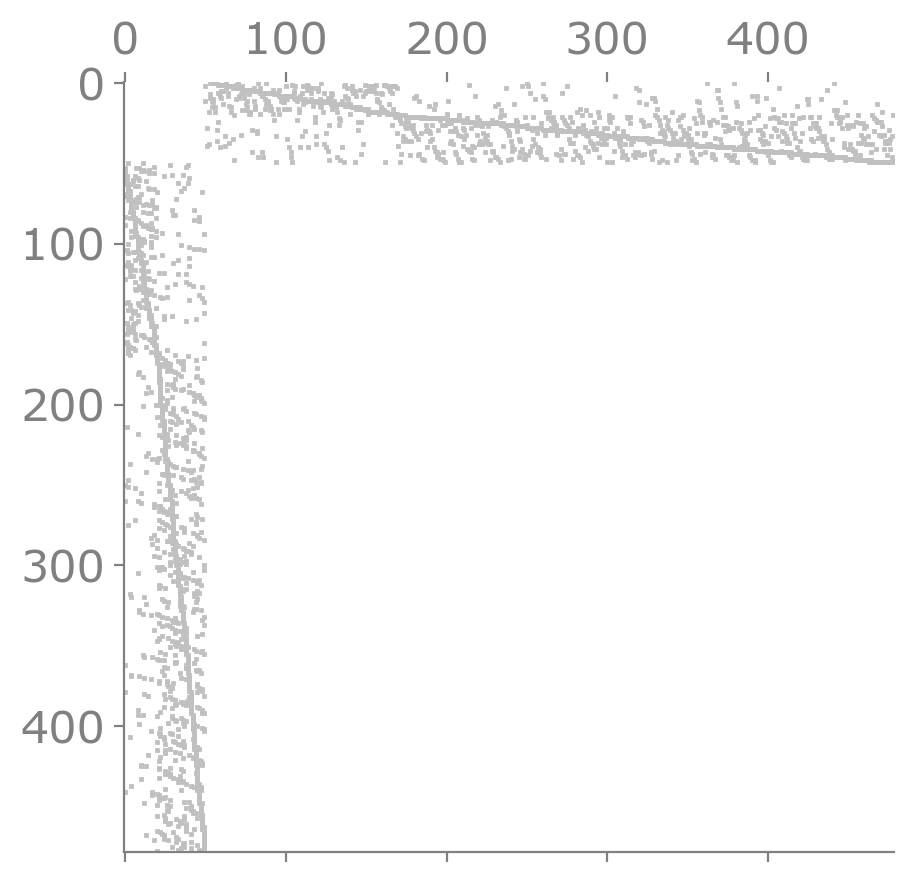

In [24]:
plt.spy(hsbm.bipartite_A, markersize=1, rasterized=True, color=gray)

# EXP on 2-order hsbm(normal graph)

## Assorative case

In [4]:
n = 1000
q = 2
d = 10
assortative = False
fileId = 'amiExp24.5.5' + f'_n={n}_q={q}_d={round(d)}'
save_path = "./result/detectabilityHyper/" + fileId + ".txt"
snrs, Results = read_exp(save_path)

Text(0, 0.5, '#Communities_BHonBA')

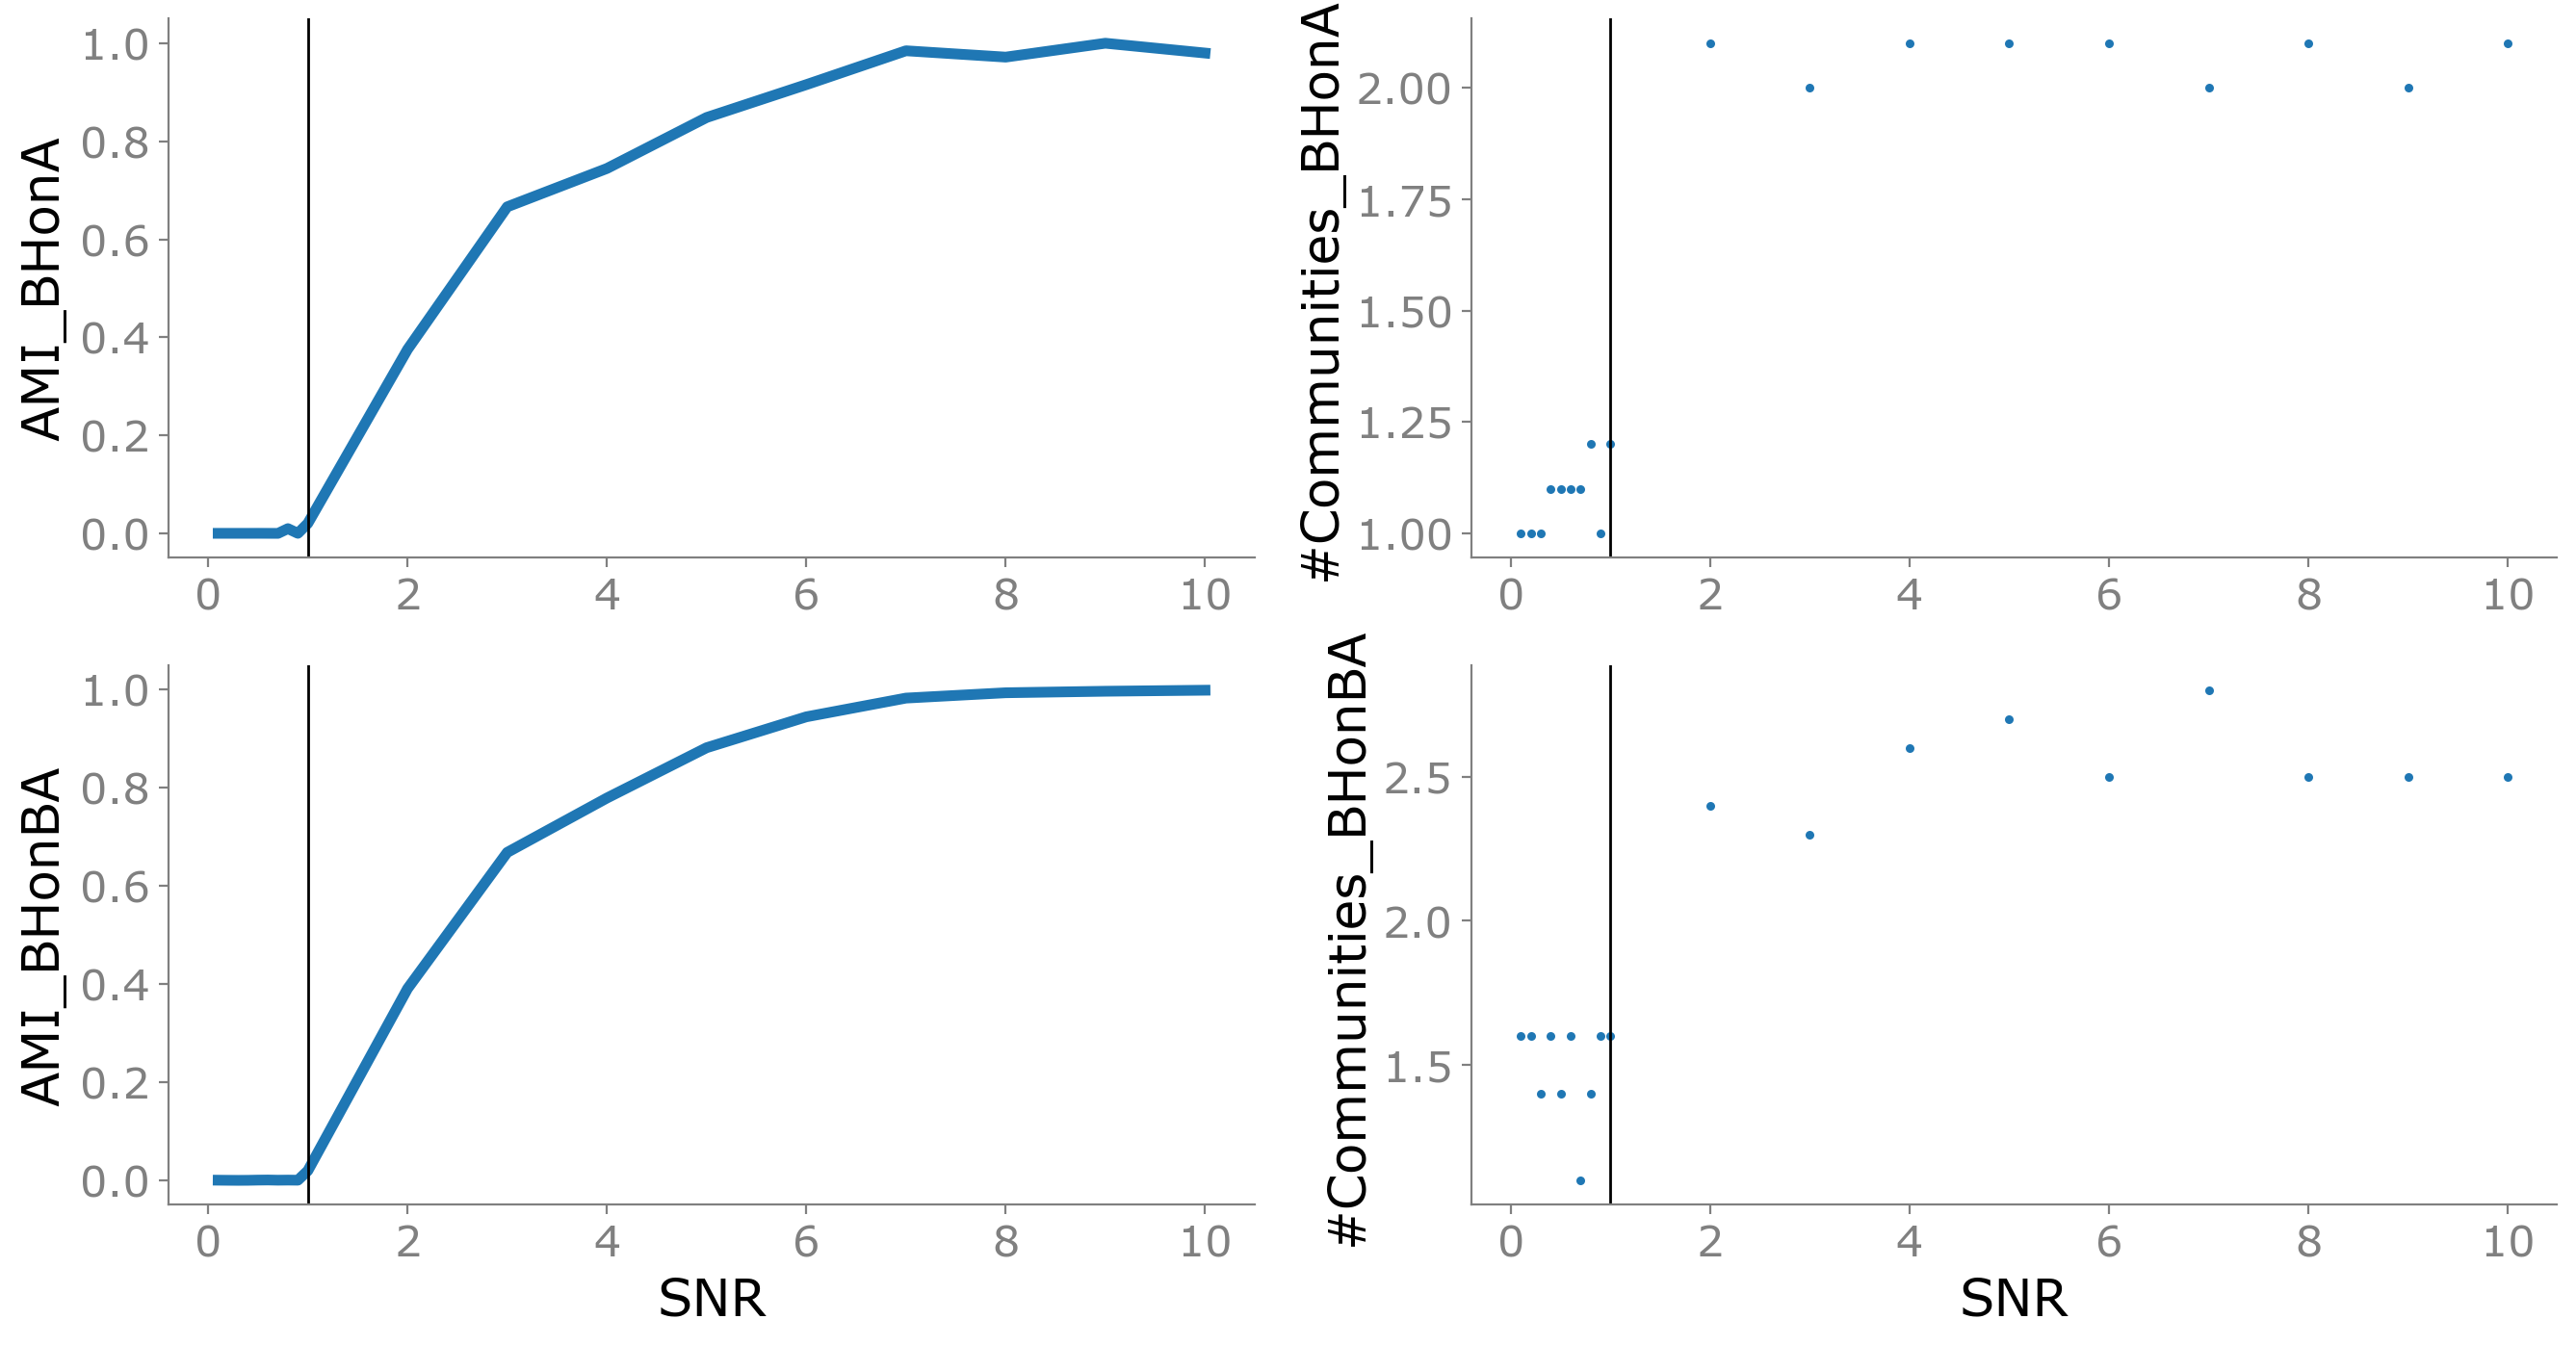

In [8]:
fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(snrs, Results[0])
plt.axvline(1, color='k', lw=1)
# plt.xlabel("SNR")
plt.ylabel("AMI_BHonA")

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.scatter(snrs, Results[1], s=5)
plt.axvline(1, color='k', lw=1)
# plt.xlabel("SNR")
plt.ylabel("#Communities_BHonA")

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(snrs, Results[2])
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("AMI_BHonBA")

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.scatter(snrs, Results[3], s=5)
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("#Communities_BHonBA")

In [29]:
n=1000
q=2
d=5
snr = 3
sizes = [int(n / q)] * q
ps_dict = dict({2: None})  # only have 2-order edges
pout = (d - np.sqrt(snr * d)) / n
pin = pout + q * np.sqrt(snr * d) / n
ps_dict[2] = (pin - pout) * np.identity(q) + pout * np.ones((q, q))
hsbm = HyperSBM(sizes, ps_dict)

Generating hyper edges for order 2...


499500it [00:12, 41238.18it/s]


Text(0.5, 1.0, 'Node-Edge Matrix')

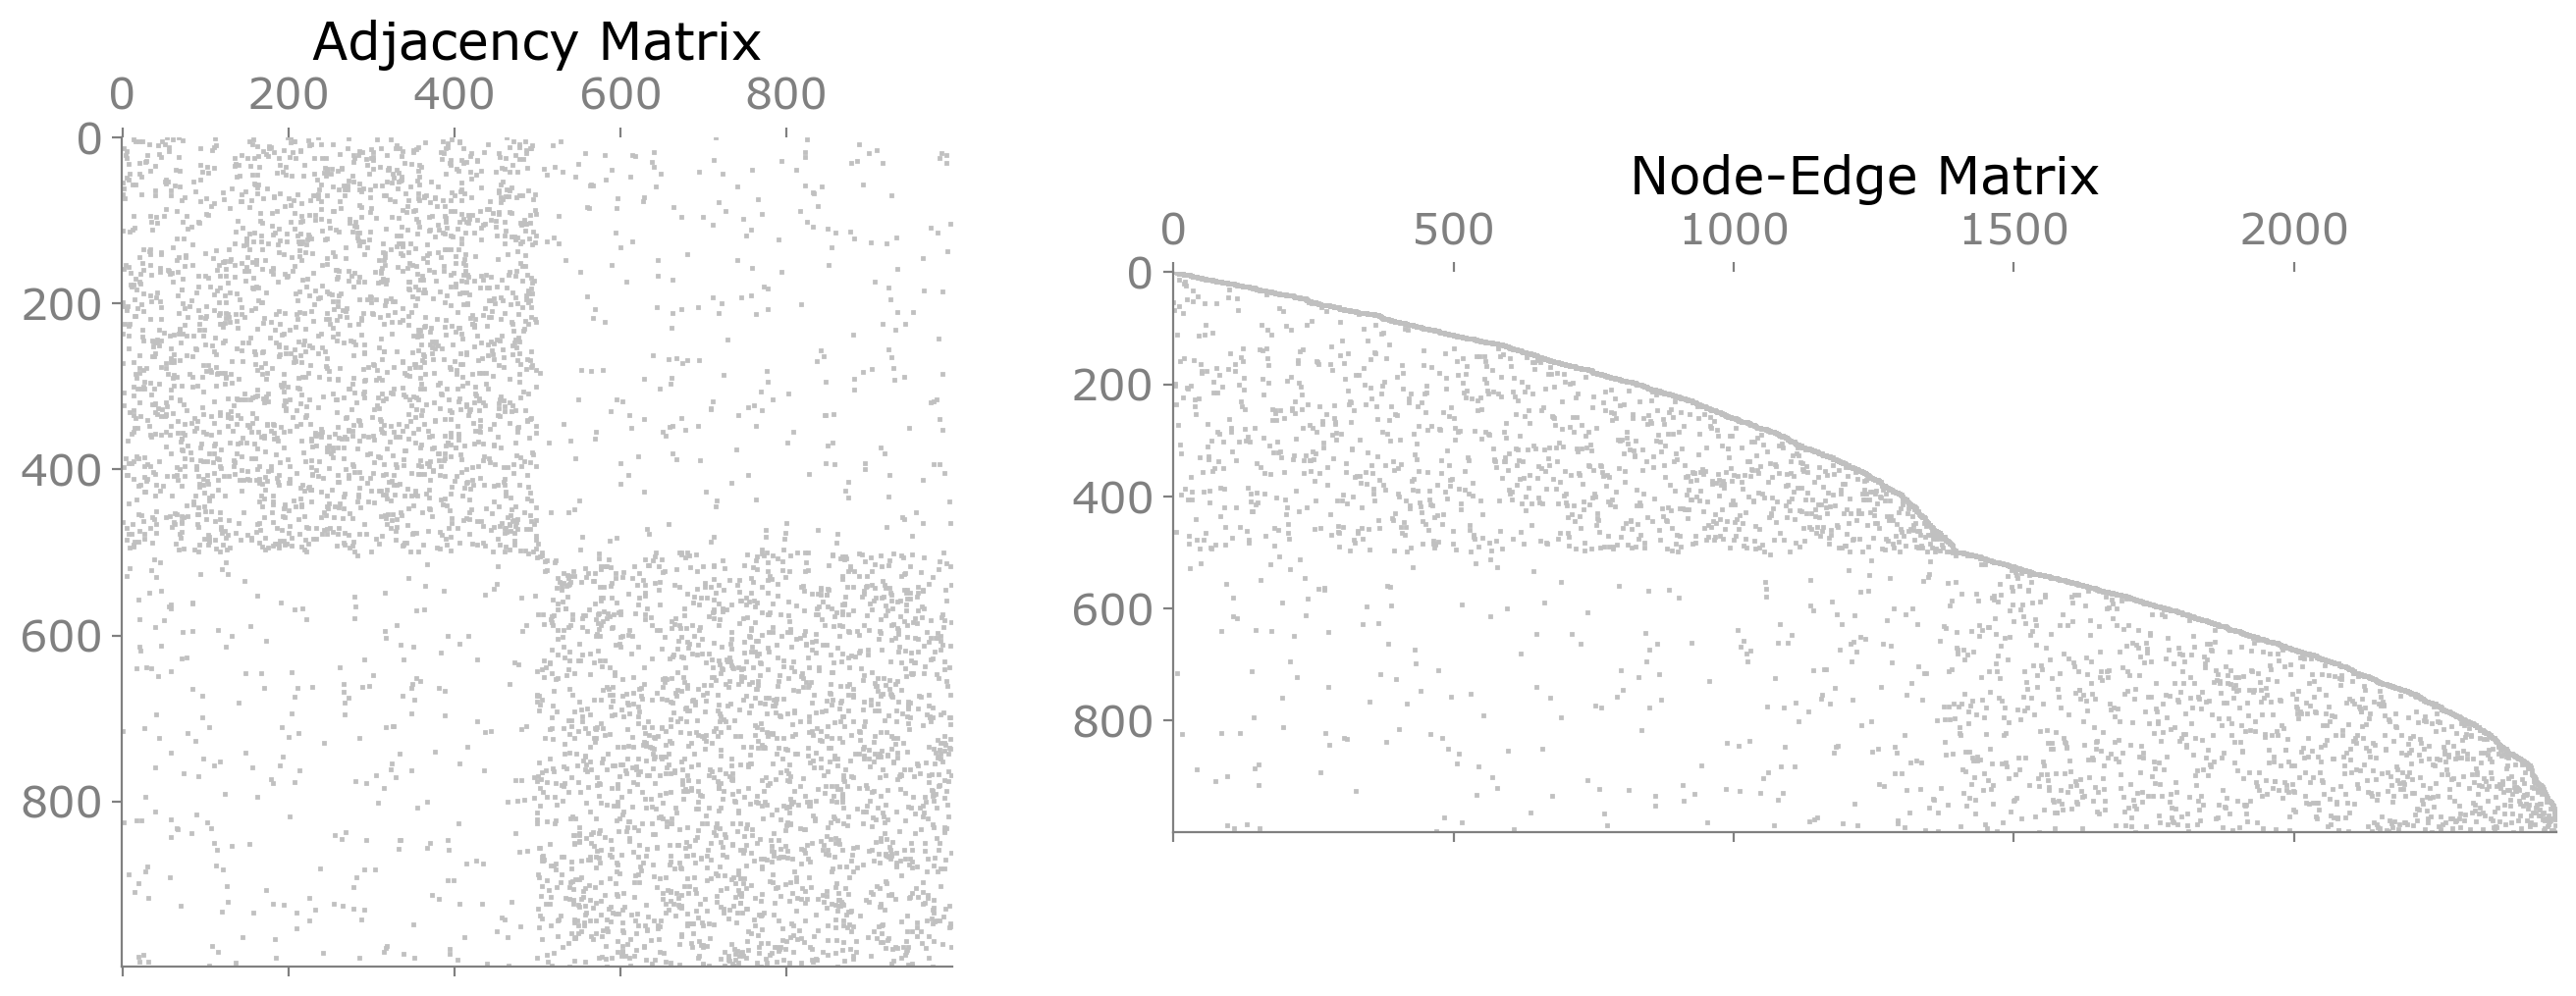

In [31]:
fig = plt.figure(figsize=(16, 16))
widths = [6, 10]
heights = [4]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.getA_2order_edges().toarray(), markersize=1, rasterized=True, color=gray)
plt.title("Adjacency Matrix")

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=1, rasterized=True, color=gray)
plt.title("Node-Edge Matrix")

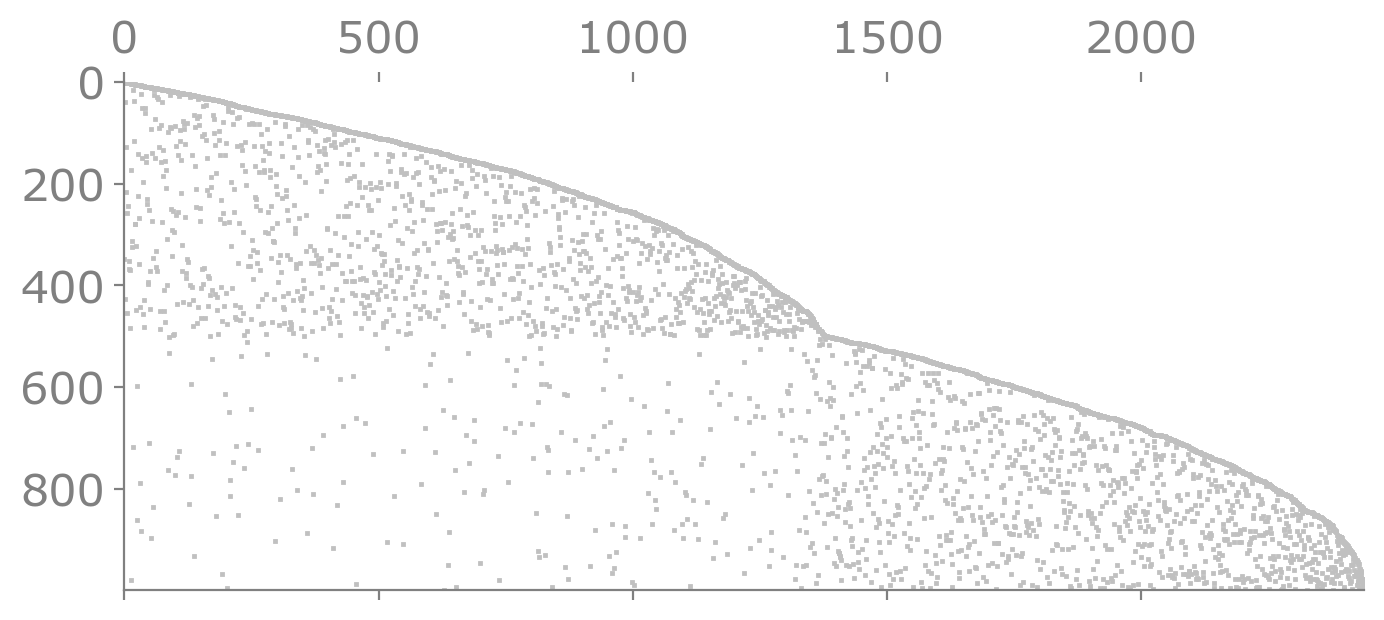

In [5]:
plt.spy(hsbm.H, markersize=1, rasterized=True, color=gray)

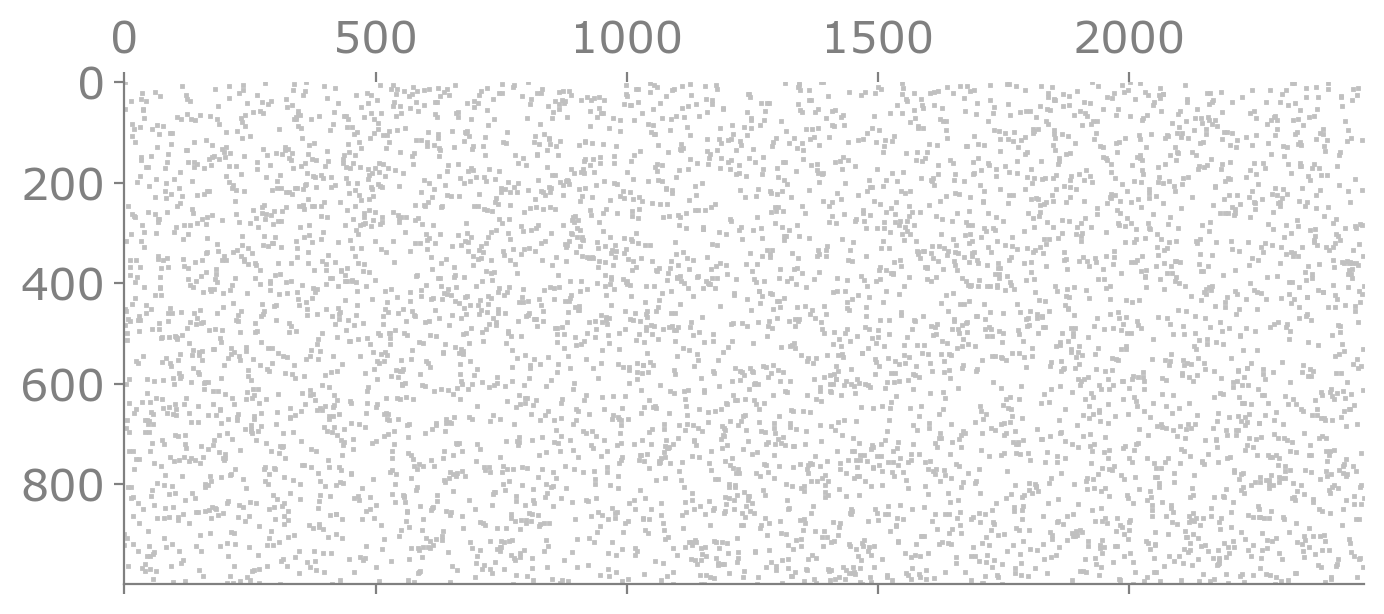

In [32]:
edge_sort_index = np.arange(np.shape(hsbm.H)[1])
random.shuffle(edge_sort_index)
# print(edge_sort_value[edge_sort_index])
randomM = hsbm.H.toarray()
randomM = randomM[:, edge_sort_index]
plt.spy(randomM, markersize=1, rasterized=True, color=gray)

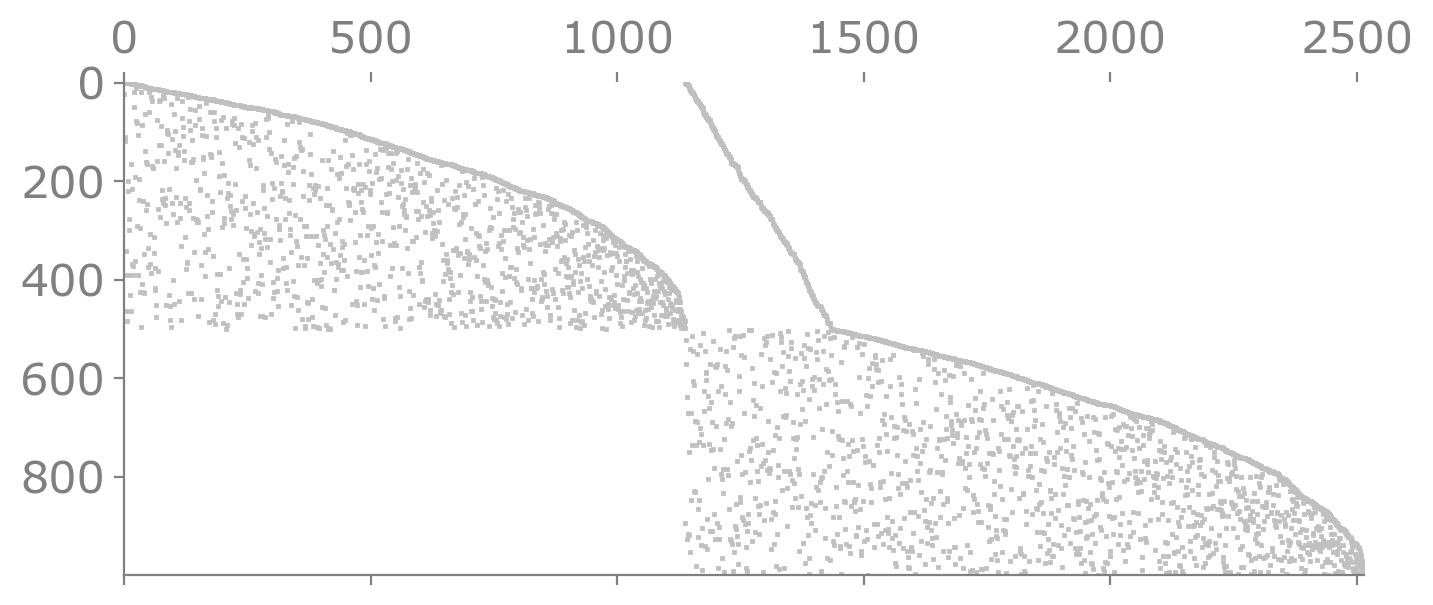

In [8]:
edge_sort_value = np.zeros(len(hsbm.A[2]))
for edgei, edge in enumerate(hsbm.A[2]):
    if hsbm.groupId[edge[0]] == 0 and hsbm.groupId[edge[1]] == 0:
        edge_sort_value[edgei] = 0
    elif hsbm.groupId[edge[0]] != hsbm.groupId[edge[1]]:
        edge_sort_value[edgei] = 1
    else:
        edge_sort_value[edgei] = 2
#     print(f'e{edgei}, {hsbm.groupId[edge[0]]}, {hsbm.groupId[edge[1]]}, {edge_sort_value[edgei]}')
edge_sort_index = np.argsort(edge_sort_value, kind='stable')
# print(edge_sort_value[edge_sort_index])
M = hsbm.H.toarray()
M = M[:, edge_sort_index]
plt.spy(M, markersize=1, rasterized=True, color=gray)

In [9]:
lefttop = csr_array(np.zeros((hsbm.n, hsbm.n)))
rightbottom = csr_array(np.zeros((hsbm.e, hsbm.e)))
bipartite_M = csr_array(vstack([hstack([lefttop, M]), hstack([M.transpose(), rightbottom])]))
true_numberpartition = 5
edge_unique_value, counts = np.unique(edge_sort_value, return_counts=True)
true_partition = np.concatenate([np.array(hsbm.groupId), np.array([2] * counts[0] + [3] * counts[1] + [4] * counts[2])])
print(list(zip(edge_unique_value, counts)))

[(0.0, 1138), (1.0, 295), (2.0, 1083)]


In [13]:
np.set_printoptions(suppress=True)
start = time.time()
A = bipartite_M
bM_BHpartition, bM_BHnumgroups = CommunityDetect(A).BetheHessian()
ami = adjusted_mutual_info_score(hsbm.groupId, bM_BHpartition[:n])
node_partition = bM_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
bMcm, _ = get_confusionmatrix(true_partition, node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in bipartite_H: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(bMcm)}) is: \n{bMcm}")

number of groups = 4, Kpos=2, Kneg=2
True index is [0 1 2 4], Community detected index is [3 0 1 2]
BH result in bipartite_H: 0.7146758884912839. Time=0.6417100429534912. Confusion Matrix((5, 4)) is: 
[[ 475.   24.    1.    0.]
 [  21.  474.    5.    0.]
 [   0.    0. 1127.   11.]
 [   0.    0.  137.  158.]
 [   0.    0.   10. 1073.]]


In [21]:
start = time.time()
A = hsbm.bipartite_A
A_BHpartition, A_BHnumgroups = CommunityDetect(A).BetheHessian()
# ami = adjusted_mutual_info_score(bsbm.groupId[n1:], BTB_BHpartition)
true_numberpartition = 3
true_partition = np.concatenate([np.array(hsbm.groupId), np.array([2] * hsbm.e)])
node_partition = A_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BTBcm, _ = get_confusionmatrix(true_partition, node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BTB: . Time={time.time() - start}. Confusion Matrix({np.shape(BTBcm)}) is: \n{BTBcm}")

number of groups = 4, Kpos=2, Kneg=2
True index is [0 1 2], Community detected index is [3 2 0]
BH result in BTB: . Time=0.6893491744995117. Confusion Matrix((3, 4)) is: 
[[ 477.    0.   21.    2.]
 [  30.    0.  466.    4.]
 [   0. 1285.    0. 1312.]]


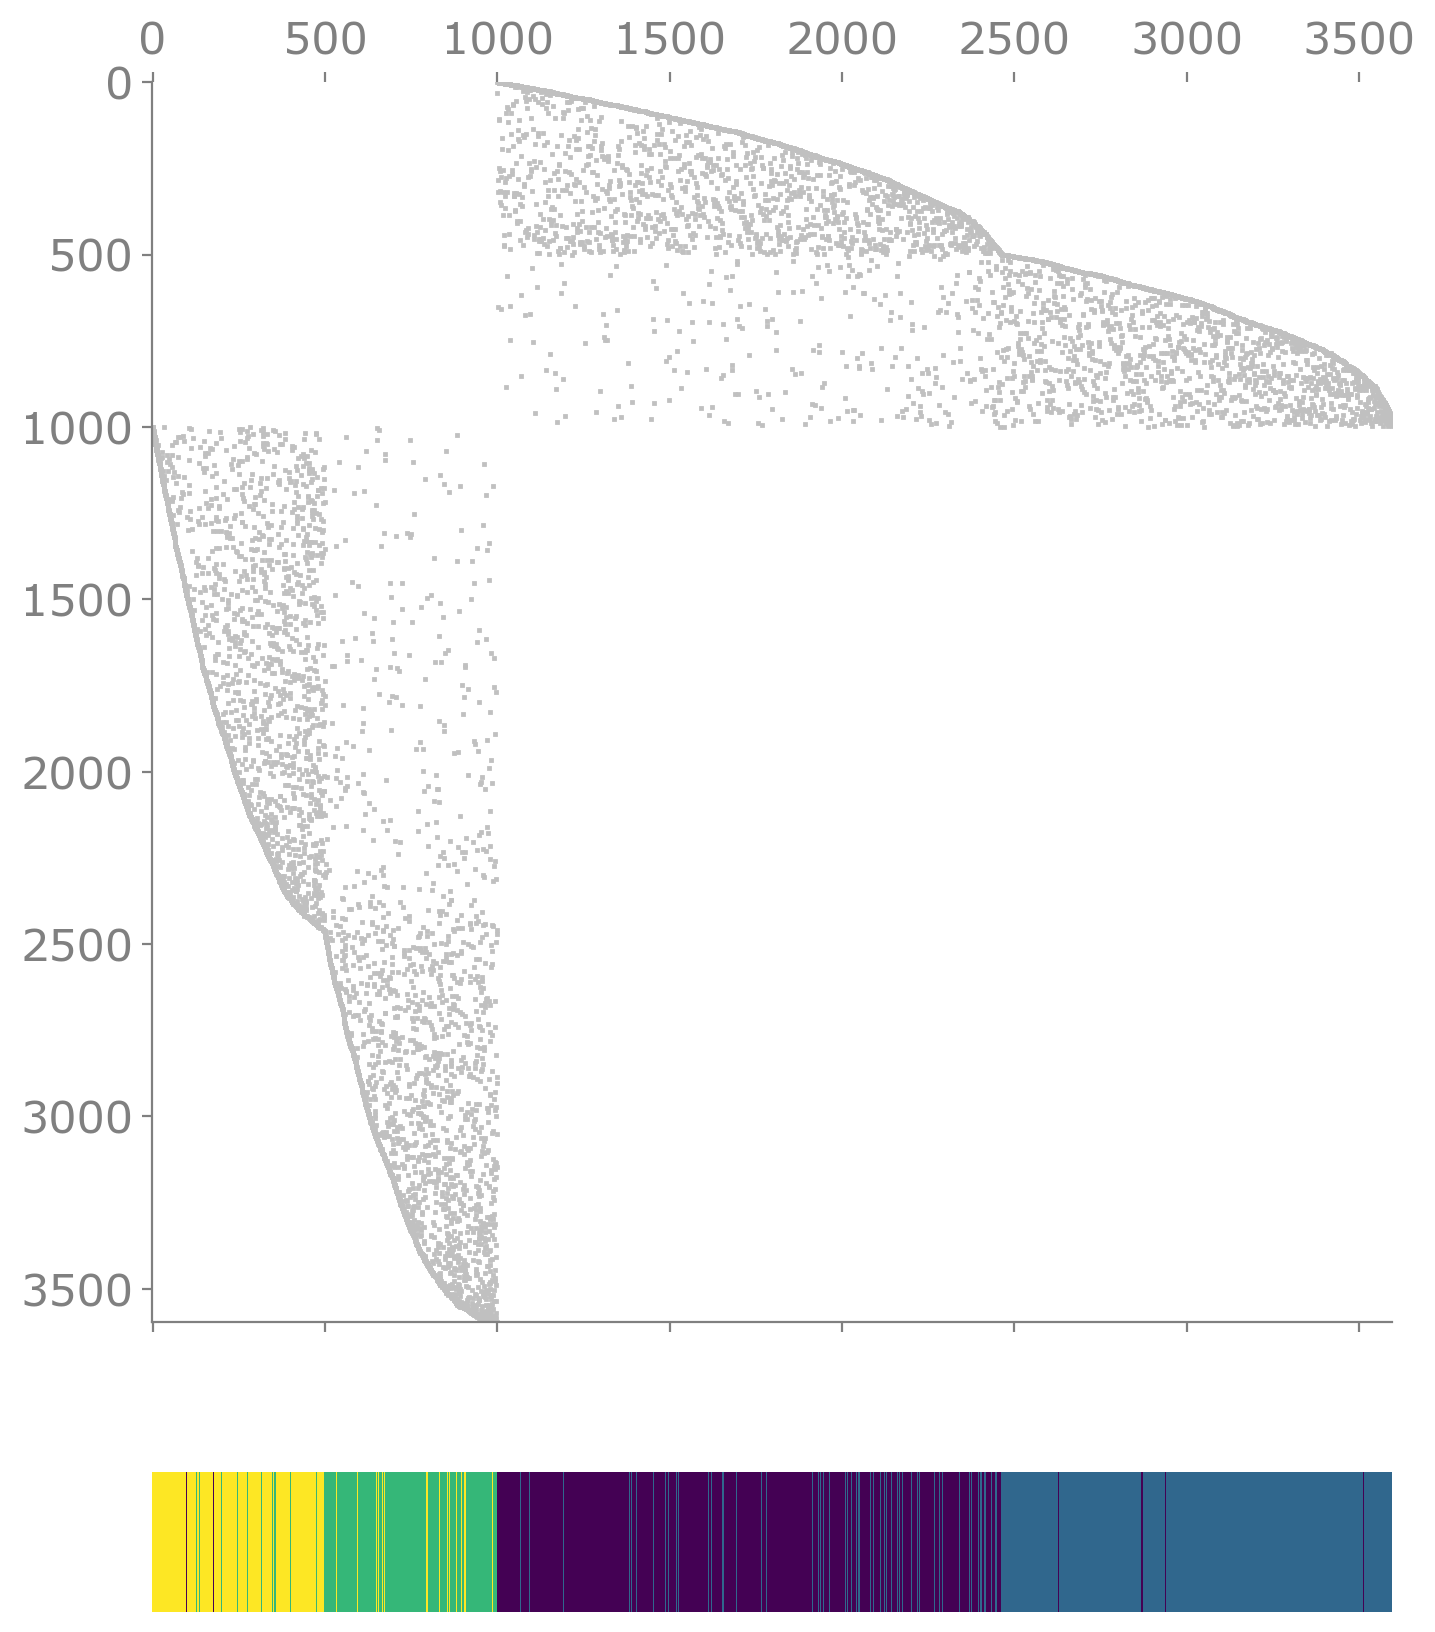

In [40]:
fig = plt.figure(figsize=(8, 10))
widths = [4]
heights = [9, 1]
spec5 = fig.add_gridspec(ncols=1, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.bipartite_A, markersize=1, rasterized=True, color=gray)

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
pixel_per_bar = 4
dpi = 100
# fig = plt.figure(figsize=(len(A_BHpartition) * pixel_per_bar / dpi, 2), dpi=dpi)
# ax = fig.add_axes([0, 0, 1, 1])  # span the whole figure
ax.set_axis_off()
ax.imshow(A_BHpartition.reshape(1, -1), aspect='auto',interpolation='nearest')

In [13]:
np.concatenate([np.array(hsbm.groupId), np.array([2] * hsbm.e)])

array([0, 0, 0, ..., 2, 2, 2])

## Disassortative case

In [3]:
n=1000
q=2
d=5
snr = 3
sizes = [int(n / q)] * q
ps_dict = dict({2: None})  # only have 2-order edges
pin = (d - np.sqrt(snr * d)) / n
pout = pin + q * np.sqrt(snr * d) / n
print(f'pin={pin}, pout={pout}')
ps_dict[2] = (pin - pout) * np.identity(q) + pout * np.ones((q, q))
hsbm = HyperSBM(sizes, ps_dict)

pin=0.001127016653792583, pout=0.008872983346207416
Generating hyper edges for order 2...


499500it [00:11, 41971.58it/s]


Text(0.5, 1.0, 'Node-Edge Matrix')

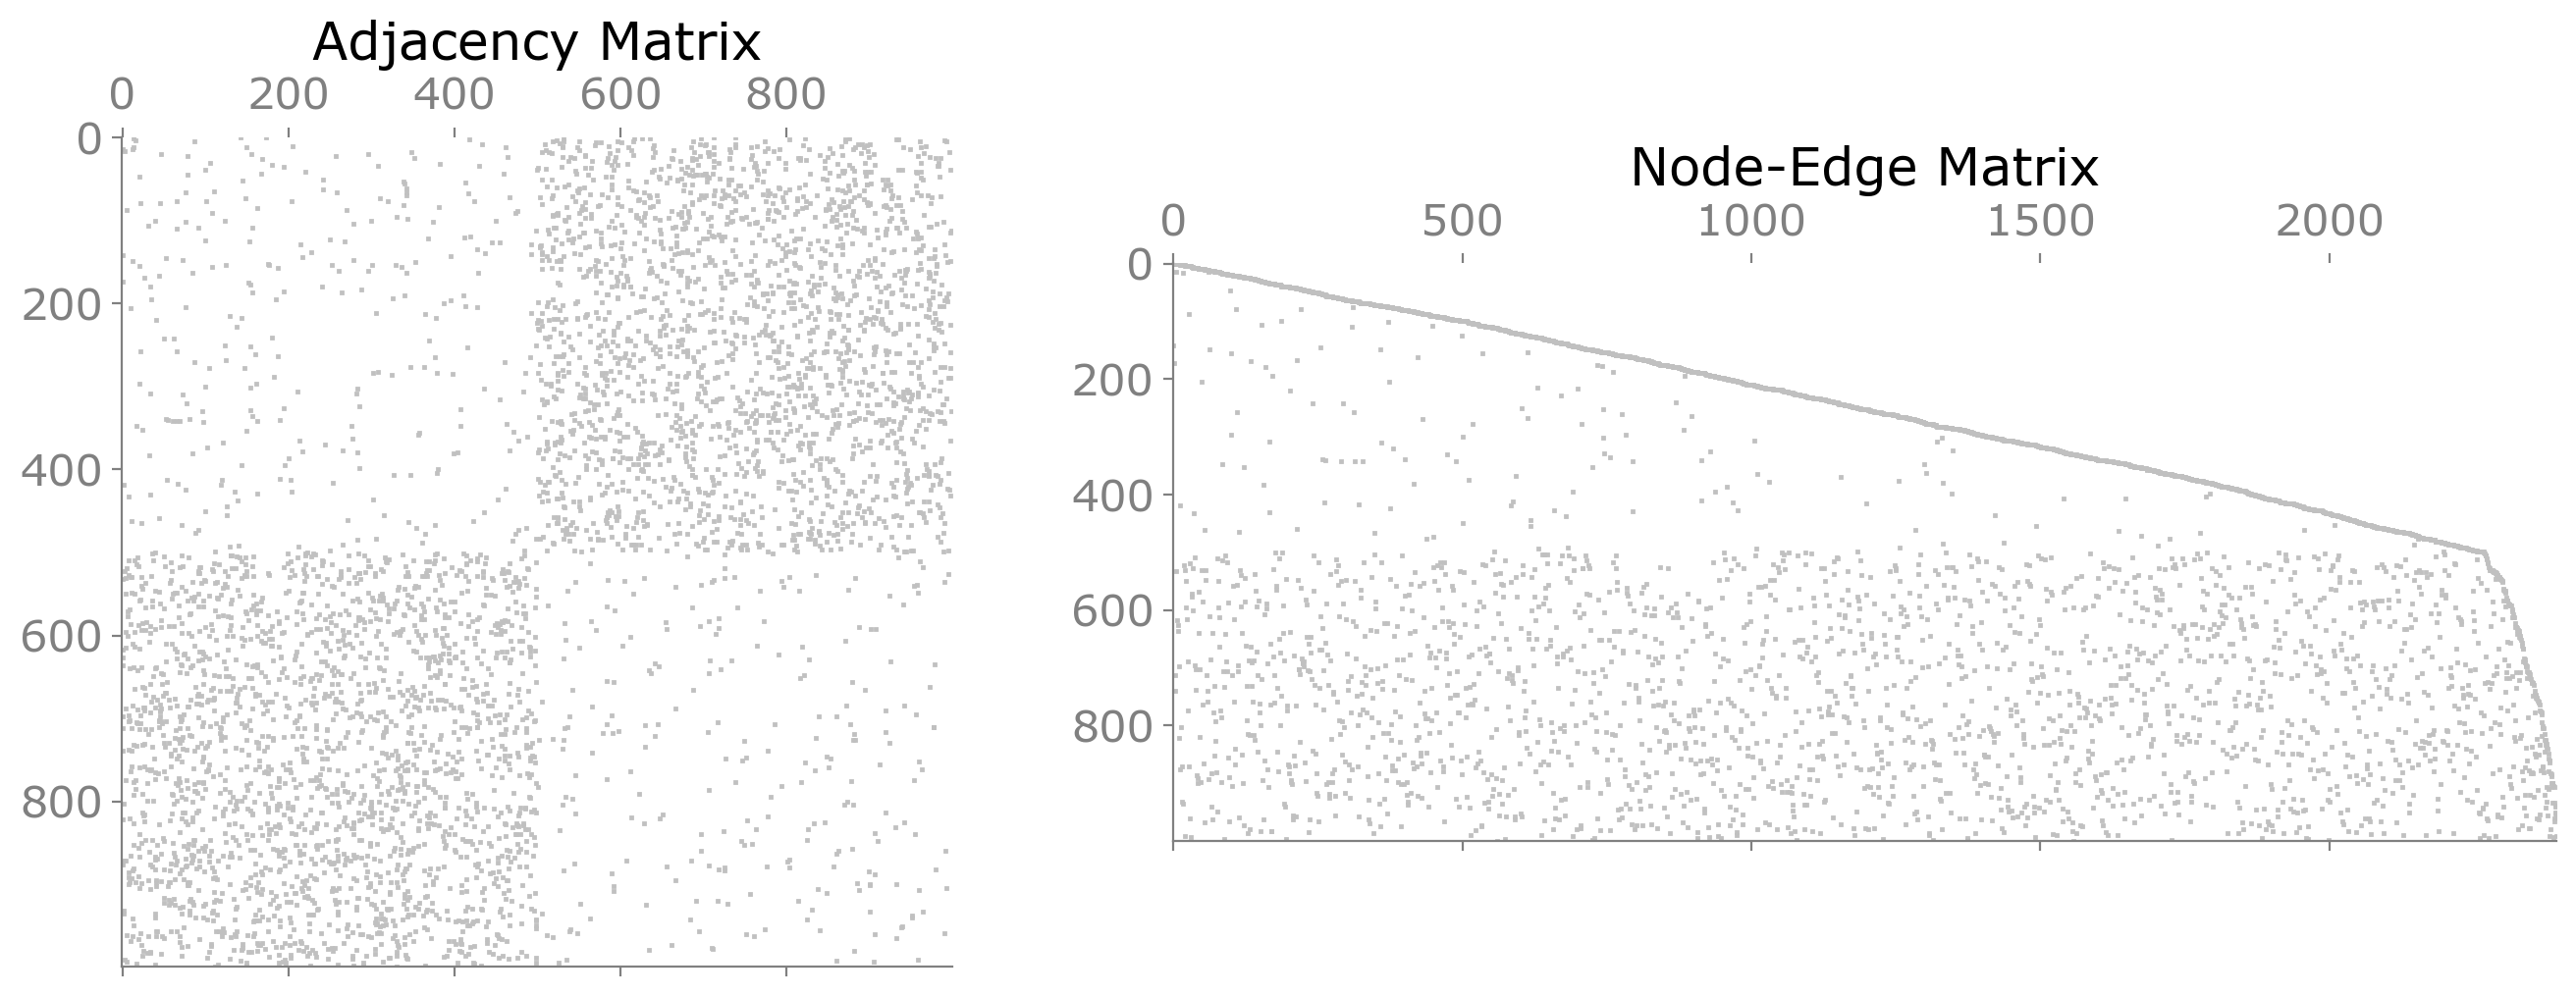

In [15]:
fig = plt.figure(figsize=(16, 16))
widths = [6, 10]
heights = [4]
spec5 = fig.add_gridspec(ncols=2, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.getA_2order_edges().toarray(), markersize=1, rasterized=True, color=gray)
plt.title("Adjacency Matrix")

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=1, rasterized=True, color=gray)
plt.title("Node-Edge Matrix")

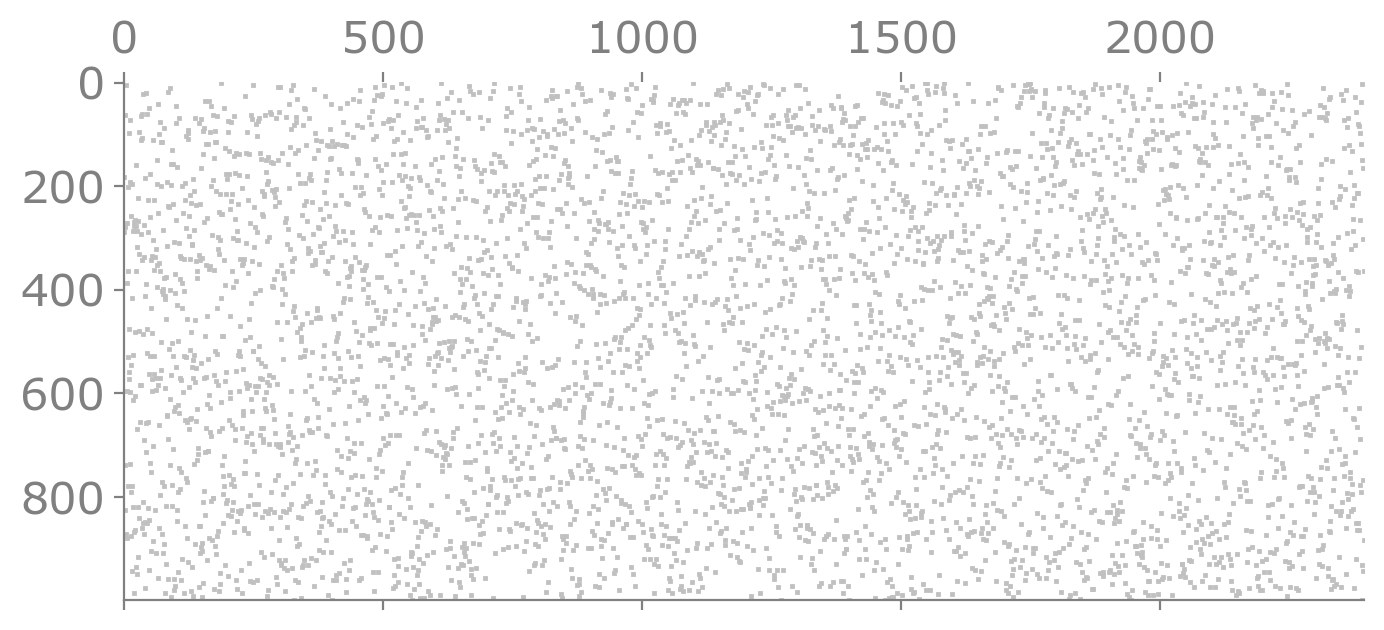

In [28]:
# print(random.shuffle(np.arange(np.shape(hsbm.H)[1])))
edge_sort_index = np.arange(np.shape(hsbm.H)[1])
random.shuffle(edge_sort_index)
# print(edge_sort_value[edge_sort_index])
randomM = hsbm.H.toarray()
randomM = randomM[:, edge_sort_index]
plt.spy(randomM, markersize=1, rasterized=True, color=gray)

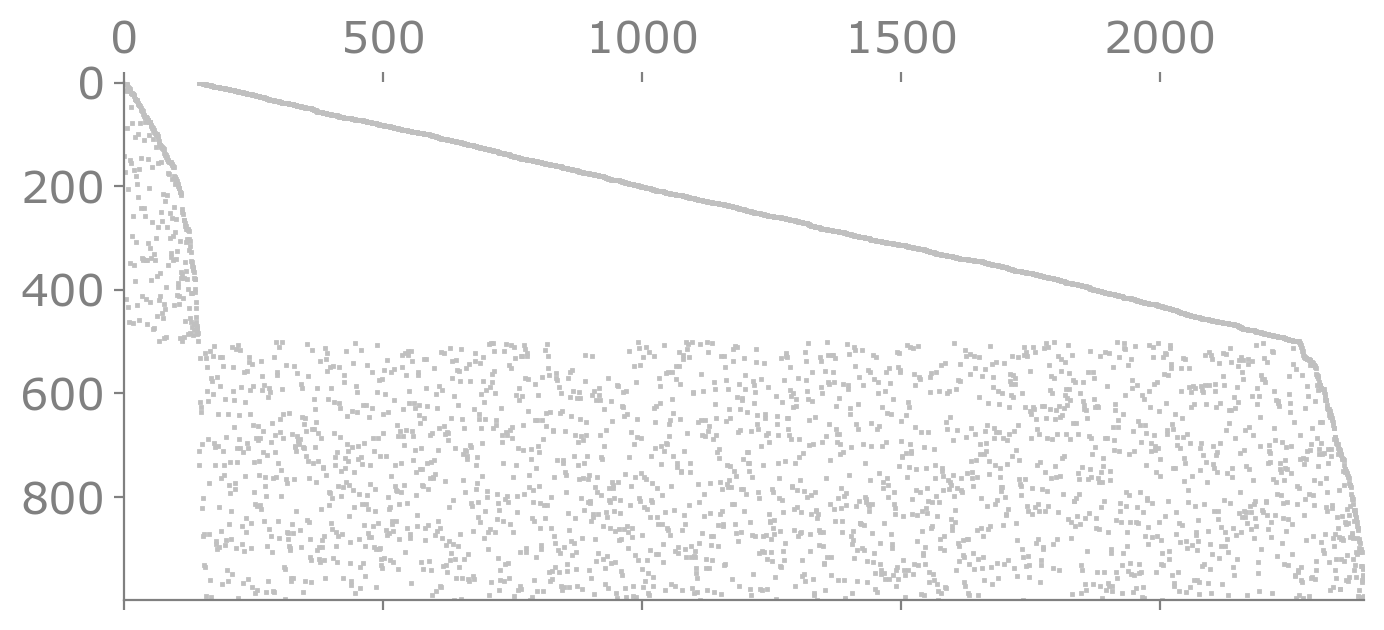

In [16]:
edge_sort_value = np.zeros(len(hsbm.A[2]))
for edgei, edge in enumerate(hsbm.A[2]):
    if hsbm.groupId[edge[0]] == 0 and hsbm.groupId[edge[1]] == 0:
        edge_sort_value[edgei] = 0
    elif hsbm.groupId[edge[0]] != hsbm.groupId[edge[1]]:
        edge_sort_value[edgei] = 1
    else:
        edge_sort_value[edgei] = 2
#     print(f'e{edgei}, {hsbm.groupId[edge[0]]}, {hsbm.groupId[edge[1]]}, {edge_sort_value[edgei]}')
edge_sort_index = np.argsort(edge_sort_value, kind='stable')
# print(edge_sort_value[edge_sort_index])
M = hsbm.H.toarray()
M = M[:, edge_sort_index]
plt.spy(M, markersize=1, rasterized=True, color=gray)

In [17]:
lefttop = csr_array(np.zeros((hsbm.n, hsbm.n)))
rightbottom = csr_array(np.zeros((hsbm.e, hsbm.e)))
bipartite_M = csr_array(vstack([hstack([lefttop, M]), hstack([M.transpose(), rightbottom])]))
true_numberpartition = 5
edge_unique_value, counts = np.unique(edge_sort_value, return_counts=True)
true_partition = np.concatenate([np.array(hsbm.groupId), np.array([2] * counts[0] + [3] * counts[1] + [4] * counts[2])])
print(list(zip(edge_unique_value, counts)))

[(0.0, 143), (1.0, 2125), (2.0, 126)]


In [18]:
np.set_printoptions(suppress=True)
start = time.time()
A = bipartite_M
bM_BHpartition, bM_BHnumgroups = CommunityDetect(A).BetheHessian()
ami = adjusted_mutual_info_score(hsbm.groupId, bM_BHpartition[:n])
node_partition = bM_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
bMcm, _ = get_confusionmatrix(true_partition, node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in bipartite_H: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(bMcm)}) is: \n{bMcm}")

number of groups = 2, Kpos=1, Kneg=1
True index is [0 3], Community detected index is [1 0]
BH result in bipartite_H: 0.0008039754190264179. Time=0.5883138179779053. Confusion Matrix((5, 2)) is: 
[[ 497.    3.]
 [ 493.    7.]
 [   0.  143.]
 [   0. 2125.]
 [   0.  126.]]


In [45]:
start = time.time()
A = hsbm.bipartite_A
A_BHpartition, A_BHnumgroups = CommunityDetect(A).BetheHessian()
# ami = adjusted_mutual_info_score(bsbm.groupId[n1:], BTB_BHpartition)
true_numberpartition = 3
true_partition = np.concatenate([np.array(hsbm.groupId), np.array([2] * hsbm.e)])
node_partition = A_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BTBcm, _ = get_confusionmatrix(true_partition, node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BTB: . Time={time.time() - start}. Confusion Matrix({np.shape(BTBcm)}) is: \n{BTBcm}")

number of groups = 2, Kpos=1, Kneg=1
True index is [0 2], Community detected index is [1 0]
BH result in BTB: . Time=0.6300570964813232. Confusion Matrix((3, 2)) is: 
[[4.980e+02 2.000e+00]
 [4.960e+02 4.000e+00]
 [0.000e+00 2.498e+03]]


In [7]:
start = time.time()
A = hsbm.bipartite_A
AA = A.dot(A)
BBT = AA[:n, :n]
BBT_BHpartition, BBT_BHnumgroups = CommunityDetect(BBT).BetheHessian(num_groups=q, weighted=True)
ami = adjusted_mutual_info_score(hsbm.groupId, BBT_BHpartition)
true_numberpartition = 2
true_partition =np.array(hsbm.groupId)
node_partition = BBT_BHpartition
node_numberpartition = np.size(np.unique(node_partition))
BBTcm, _ = get_confusionmatrix(true_partition, node_partition, true_numberpartition, node_numberpartition)
print(f"BH result in BBT: {ami}. Time={time.time() - start}. Confusion Matrix({np.shape(BBTcm)}) is: \n{BBTcm}")

r=3.1887301547794853, Weighted BH build.
r=-3.1887301547794853, Weighted BH build.
True index is [0 1], Community detected index is [1 0]
BH result in BBT: 2.1172169213445458e-05. Time=1.2889328002929688. Confusion Matrix((2, 2)) is: 
[[238. 262.]
 [222. 278.]]


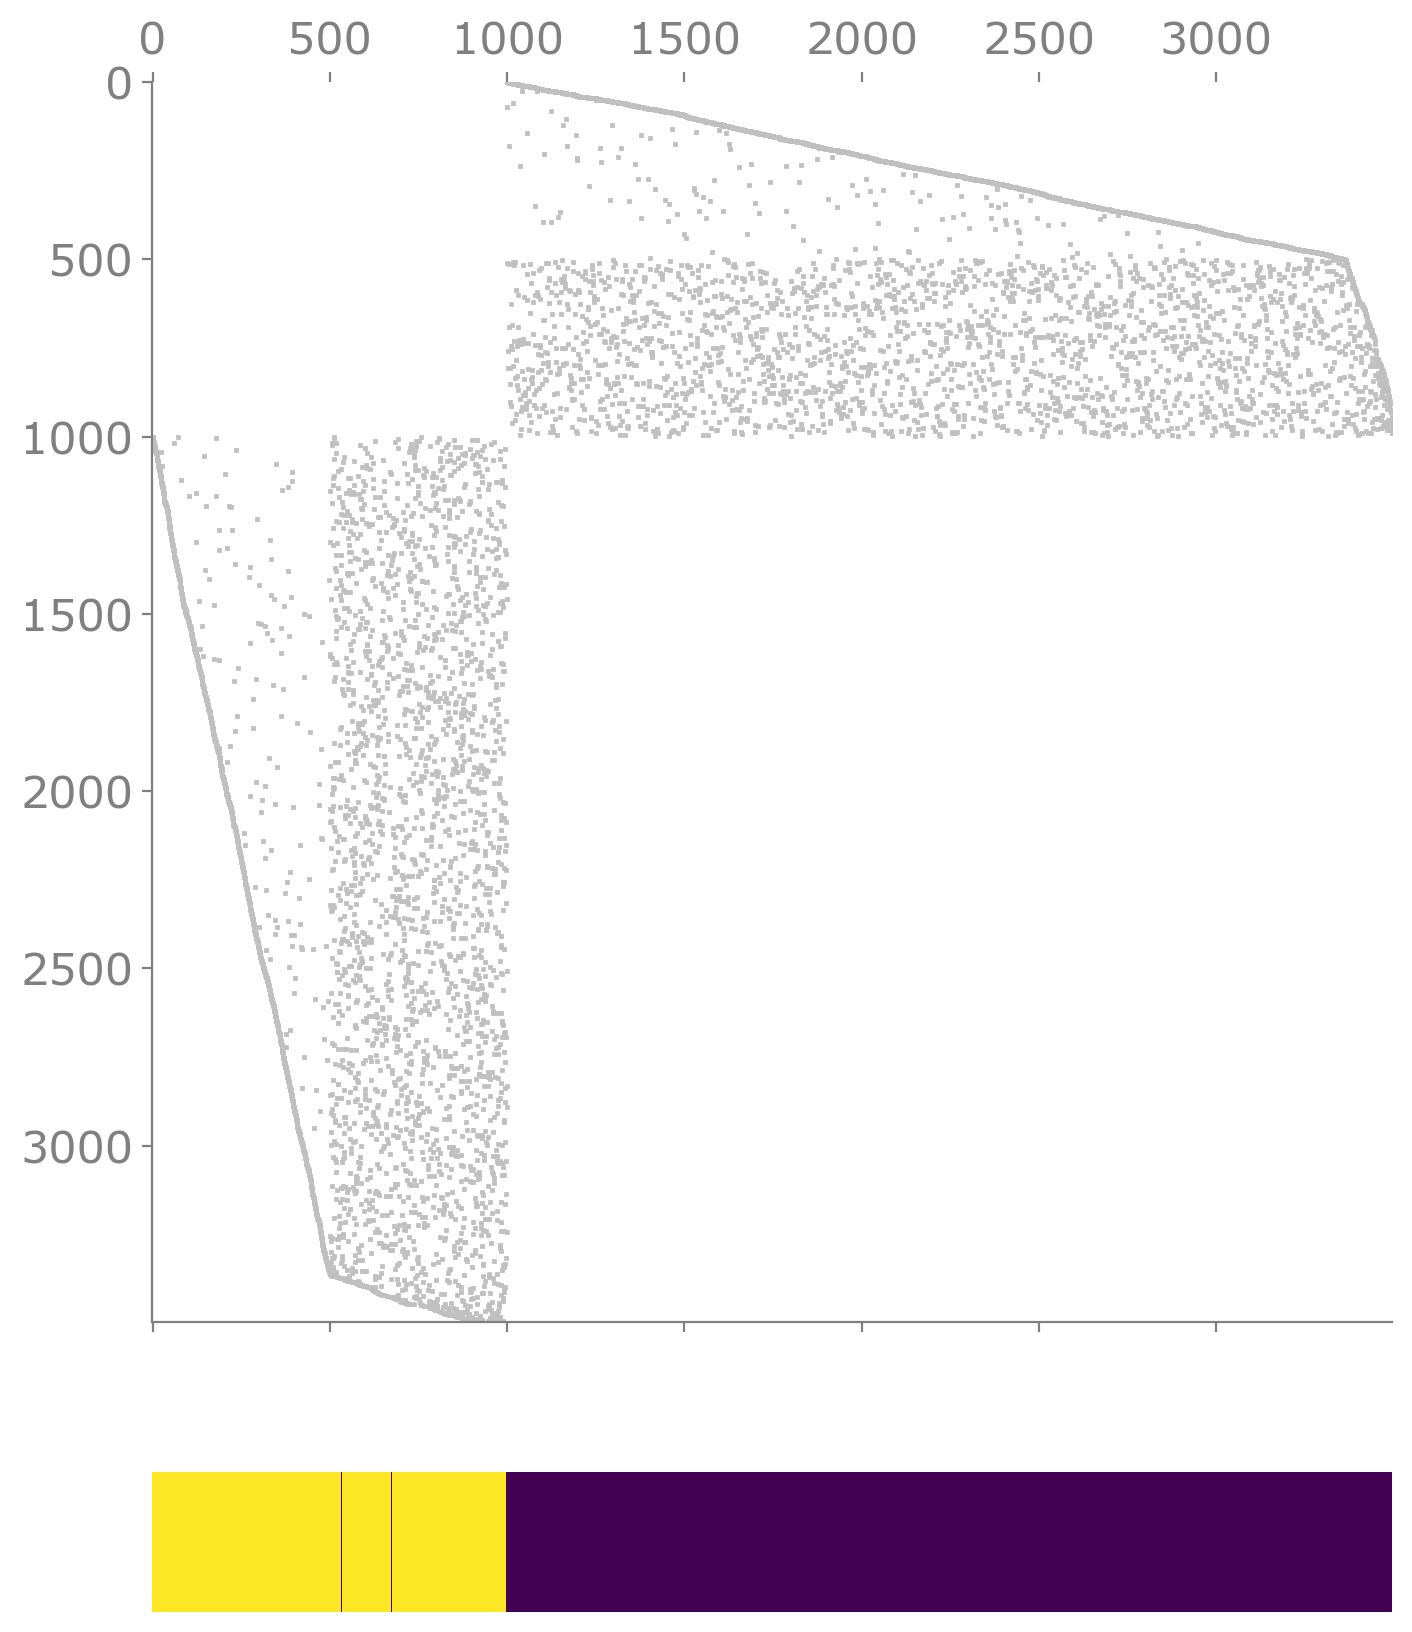

In [46]:
fig = plt.figure(figsize=(8, 10))
widths = [4]
heights = [9, 1]
spec5 = fig.add_gridspec(ncols=1, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.bipartite_A, markersize=1, rasterized=True, color=gray)

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
pixel_per_bar = 4
dpi = 100
# fig = plt.figure(figsize=(len(A_BHpartition) * pixel_per_bar / dpi, 2), dpi=dpi)
# ax = fig.add_axes([0, 0, 1, 1])  # span the whole figure
ax.set_axis_off()
ax.imshow(A_BHpartition.reshape(1, -1), aspect='auto',interpolation='nearest')

In [10]:
n = 1000
q = 2
d = 10
assortative = False
fileId = 'amiExp24.5.5' + f'_n={n}_q={q}_d={round(d)}_{"assortative" if assortative else "disassortative"}'
save_path = "./result/detectabilityHyper/" + fileId + ".txt"
snrs, Results = read_exp(save_path)

Text(0, 0.5, '#Communities_BHonBA')

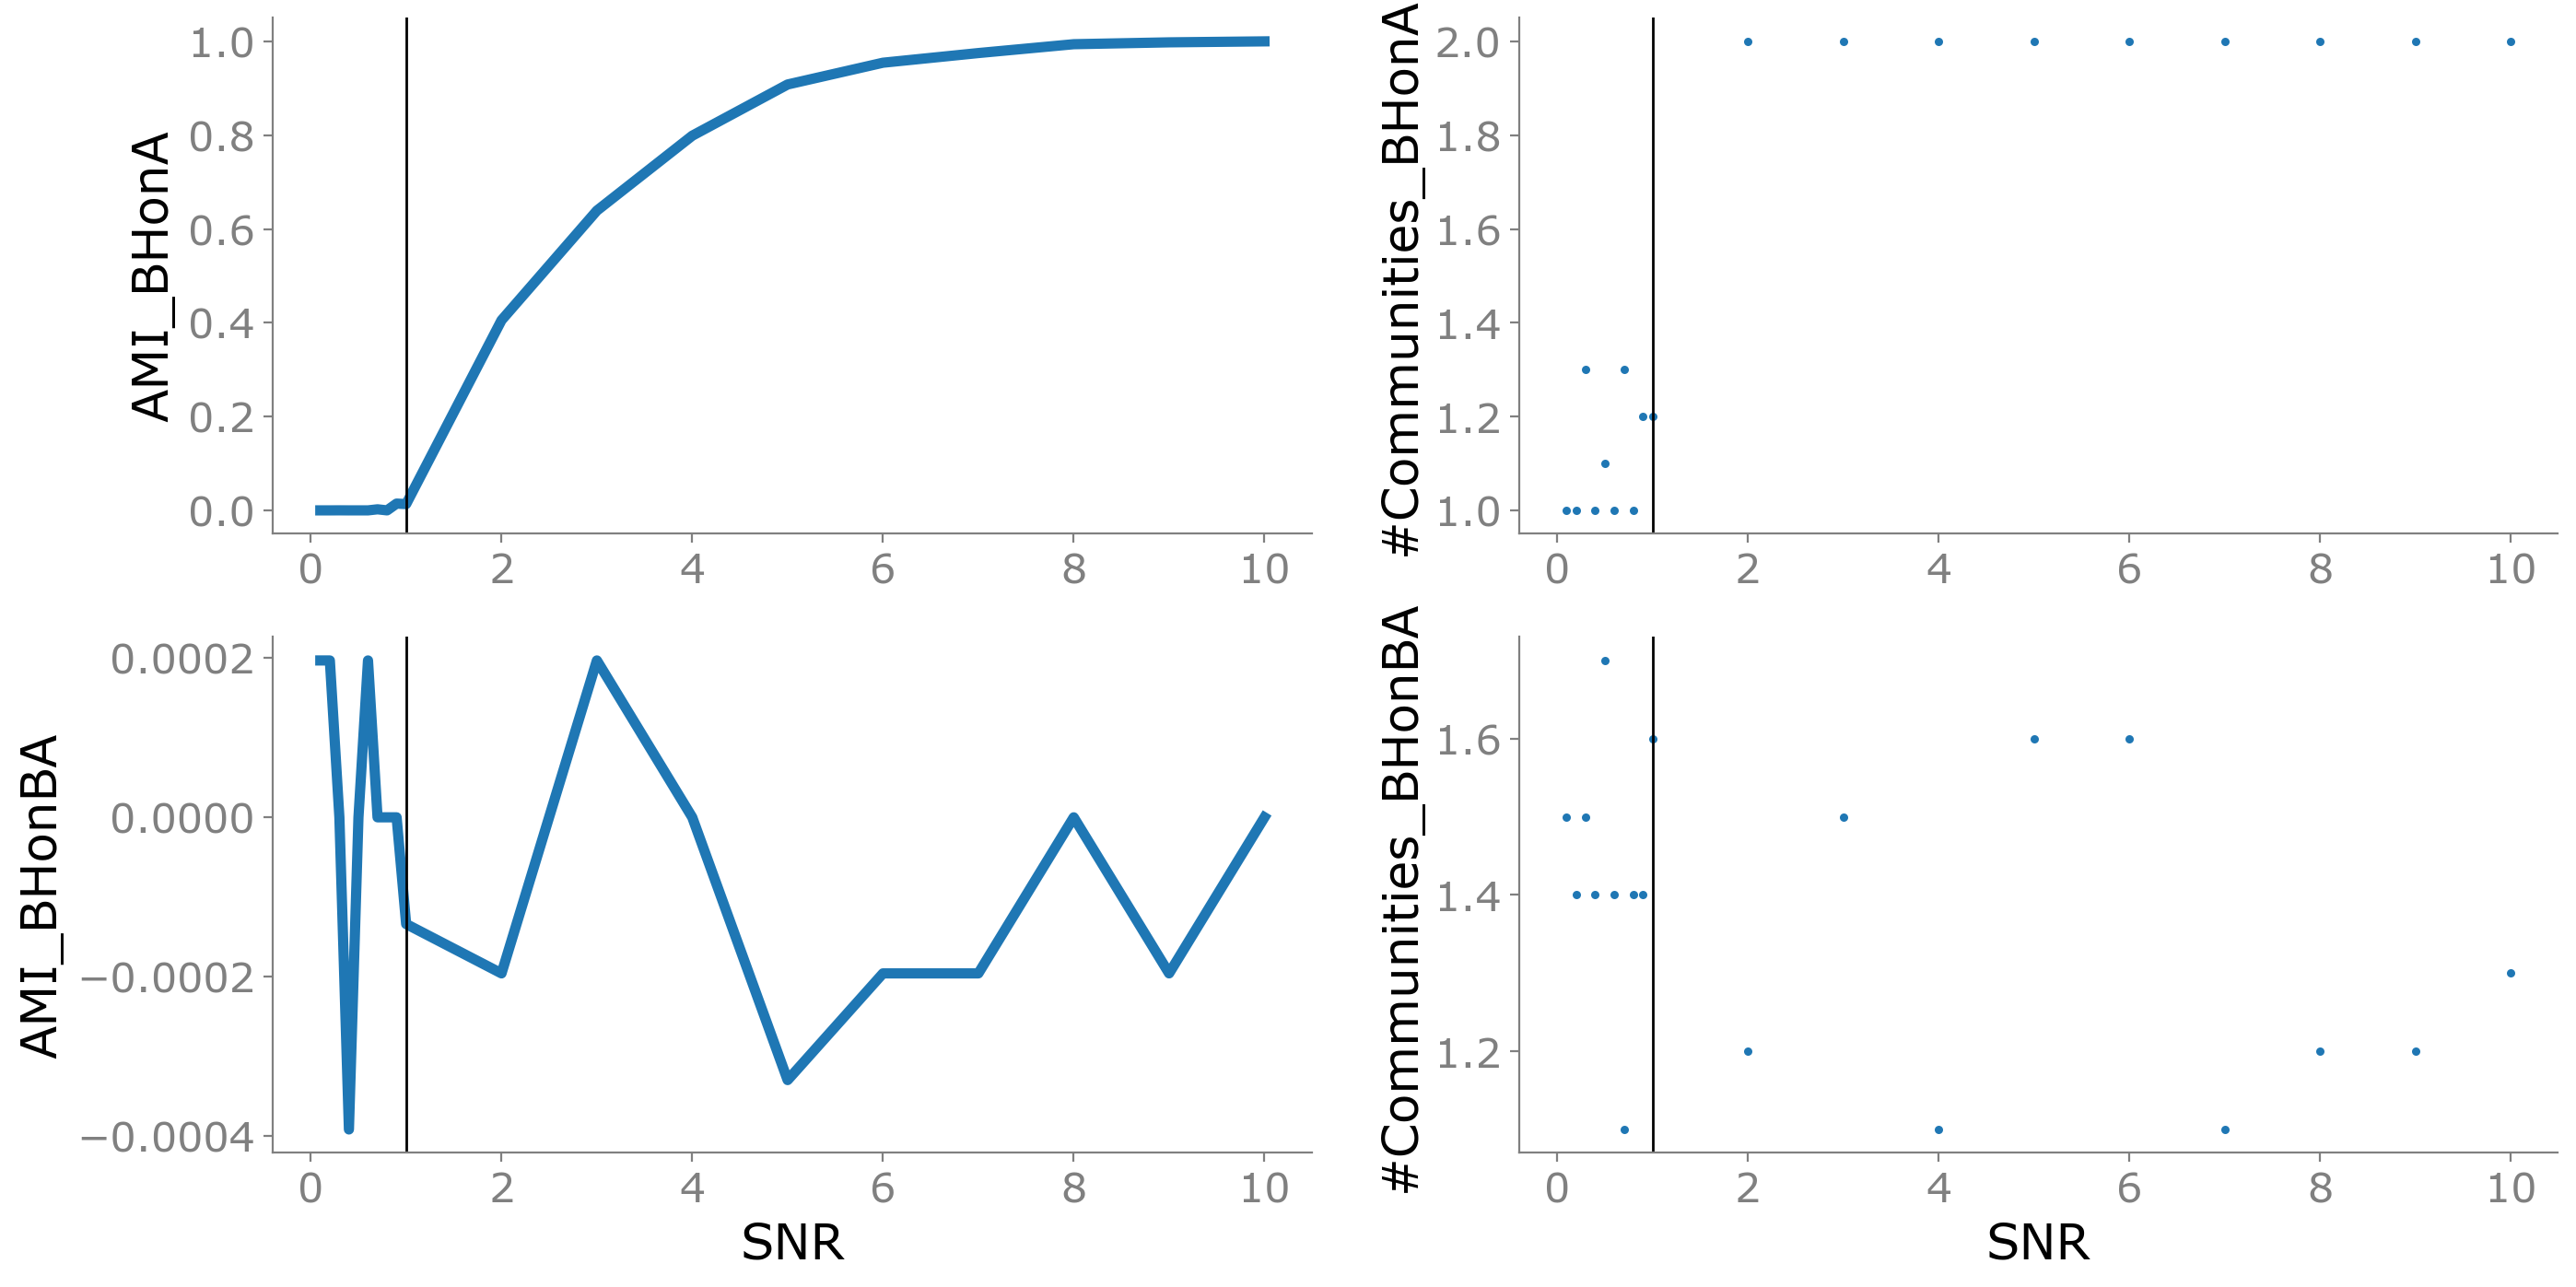

In [11]:
fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(snrs, Results[0])
plt.axvline(1, color='k', lw=1)
# plt.xlabel("SNR")
plt.ylabel("AMI_BHonA")

row = 0
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.scatter(snrs, Results[1], s=5)
plt.axvline(1, color='k', lw=1)
# plt.xlabel("SNR")
plt.ylabel("#Communities_BHonA")

row = 1
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.plot(snrs, Results[2])
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("AMI_BHonBA")

row = 1
col = 1
ax = fig.add_subplot(spec5[row, col])
plt.scatter(snrs, Results[3], s=5)
plt.axvline(1, color='k', lw=1)
plt.xlabel("SNR")
plt.ylabel("#Communities_BHonBA")

# UniformSymmetricHSBM

Generating hyper edges for order 3...


161700it [00:03, 40952.02it/s]


# of nodes 100, # of edges 111


D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


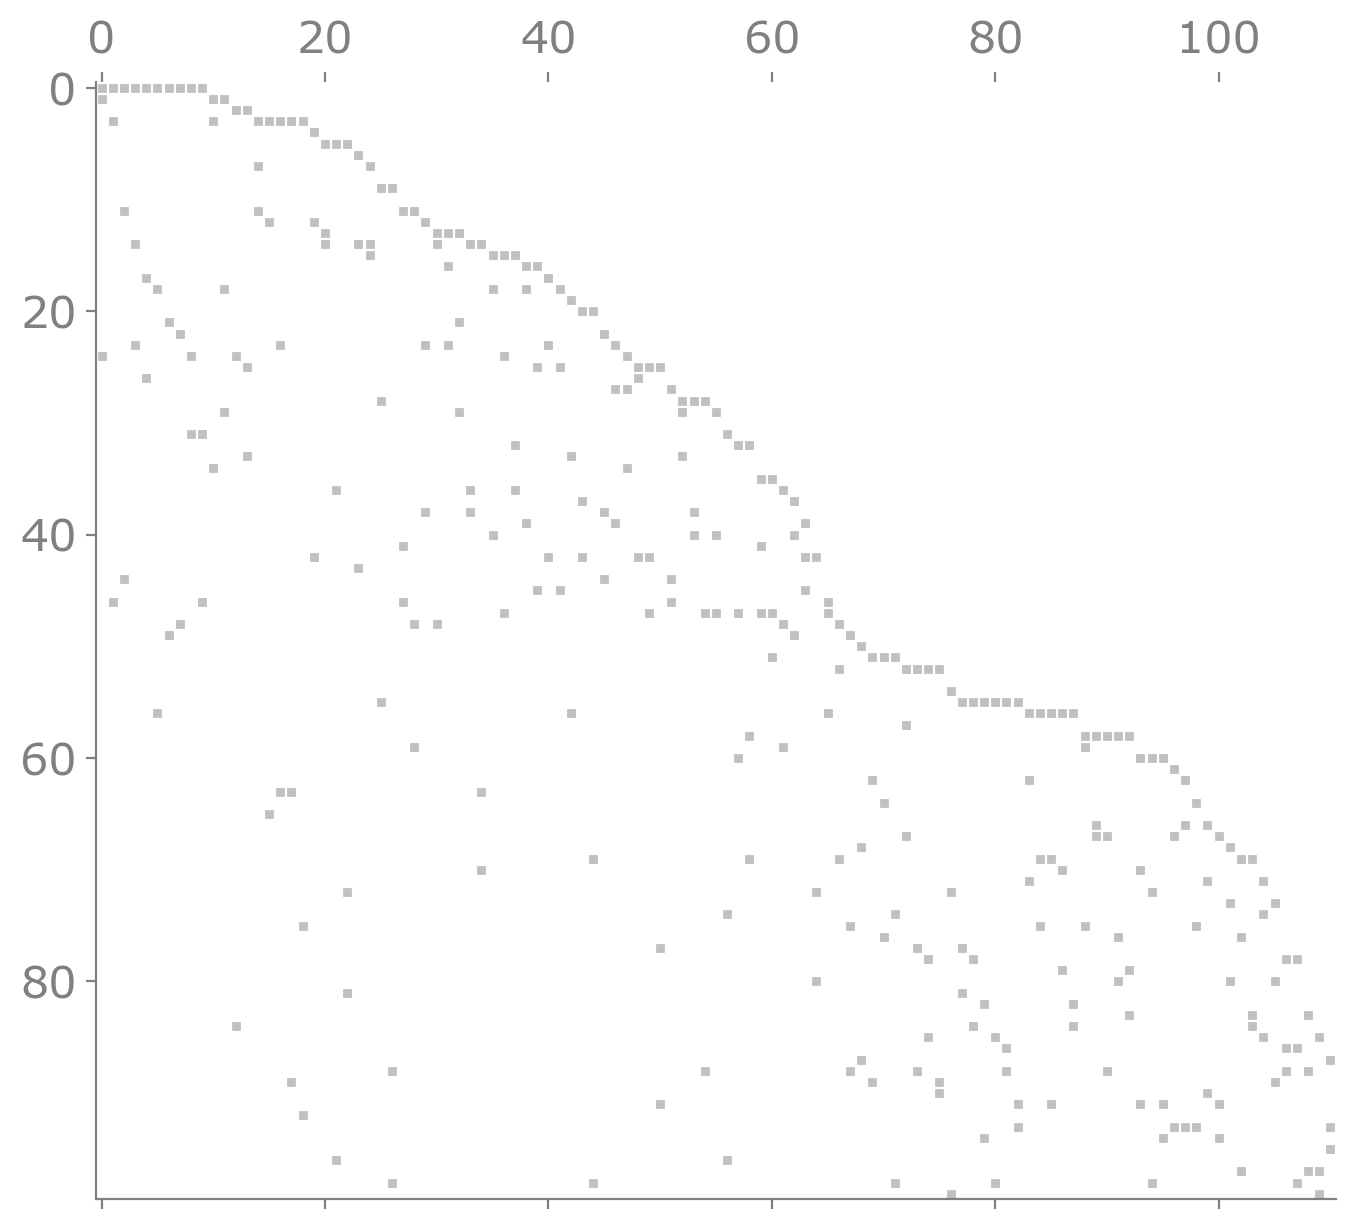

In [5]:
n = 100
q = 2
k = 3
cin = 20
cout = 2
hsbm = UniformSymmetricHSBM(n, q, k, cin, cout)
print(f'# of nodes {hsbm.n}, # of edges {hsbm.e}')
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=2, rasterized=True, color=gray)

In [3]:
def scatter_spectral(eigvalue, fig=None, ax=None, title='Spectrum'):
    # Construct scatter coordinate
    x = []
    y = []
    for _w in eigvalue:
        _x = _w.real if isinstance(_w, complex) else _w
        _y = _w.imag if isinstance(_w, complex) else 0
        x.append(_x)
        y.append(_y)
    if fig is None and ax is None:
        fig = plt.figure(figsize=(8, 8))
        widths = [4]
        heights = [4]
        spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
        row = 0
        col = 0
        ax = fig.add_subplot(spec5[row, col])
    plt.axis('equal')
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data', 0))
    ax.scatter(x, y, s=6)
    ax.set_title(title)

In [4]:
def plot_spectral_NB(sbm, d, fig, ax):
    print(f'HyperGraph, d={d}')
    NB = sbm.get_operator('NB')
    print(np.shape(NB))
    eig_B, _ = eig(NB.toarray())
    info_eig = []
    for e in eig_B:
        if abs(e) > np.sqrt(d) and e.imag == 0:
            info_eig.append(e)
    print(info_eig)
    scatter_spectral(eig_B, fig=fig, ax=ax, title="Spectrum of NB")
    ax.add_patch(Circle(xy = (0.0, 0.0), radius=np.sqrt(d), alpha=0.2))
    
    bh_samples = 10
    c = gen_colors(start=colors_red[0], end=colors_blue[0], n=bh_samples)
    i = 0
    for r in np.linspace(np.sqrt(d), max(info_eig).real, bh_samples):
        BH = sbm.get_operator('BH', r=r)
        eig_BH, _ = eig(BH.toarray())
#         eig_BH = sorted(eig_BH)
        x = []
        y = []
        for _w in eig_BH:
            _y = _w.real if isinstance(_w, complex) else _w
            x.append(r)
            y.append(_y)
        ax.scatter(x, y, s=6, c=c[i])
        i += 1
    ax.set_ylim(-10 * np.sqrt(d), 2 * np.sqrt(d))
#     BH = sbm.get_operator('BH', r=np.sqrt(d))
#     eig_BH, _ = eig(BH.toarray())
#     info_eig = []
#     for e in eig_BH:
#         if e < 0:
#             info_eig.append(e)
#     print(info_eig)
#     row = 0
#     col = 1
#     ax = fig.add_subplot(spec5[row, col])
#     scatter_spectral(eig_BH, fig=fig, ax=ax, title="Spectrum of BH with pos r")
    
#     BH = sbm.get_operator('BH', r=-np.sqrt(d))
#     eig_BH, _ = eig(BH.toarray())
#     info_eig = []
#     for e in eig_BH:
#         if e < 0:
#             info_eig.append(e)
#     print(info_eig)
#     row = 1
#     col = 1
#     ax = fig.add_subplot(spec5[row, col])
#     scatter_spectral(eig_BH, fig=fig, ax=ax, title="Spectrum of BH with neg r")

In [10]:
print(f'HyperGraph, d={d}')
NB = hsbm.get_operator('NB')
print(np.shape(NB))
eig_NB, eigv_NB = eig(NB.toarray())
info_eig = []
for e in eig_NB:
    if abs(e) > np.sqrt(d*(k-1)) and e.imag == 0:
        info_eig.append(e)
print(info_eig)

HyperGraph, d=3.33
Non-backtrack constructing for 333 directed node-hyperEdge pairs...


110889it [01:08, 1628.02it/s]

(333, 333)
[(6.790726623845399+0j), (4.734589066109242+0j)]


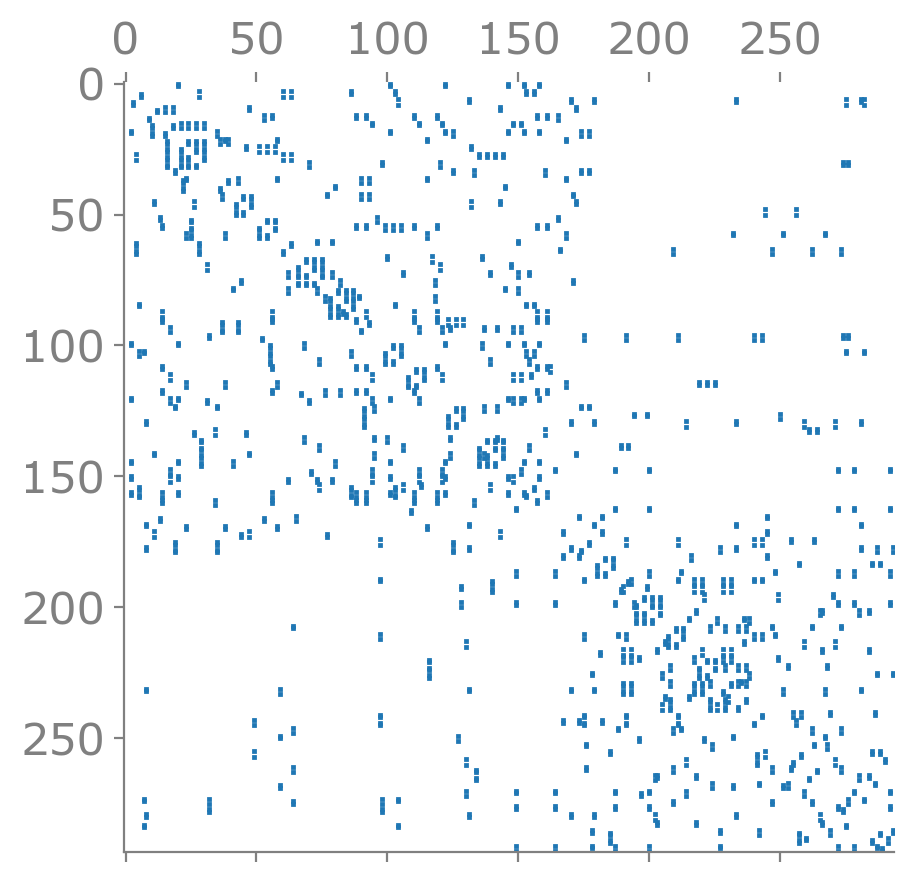

In [25]:
plt.spy(NB, markersize=1)

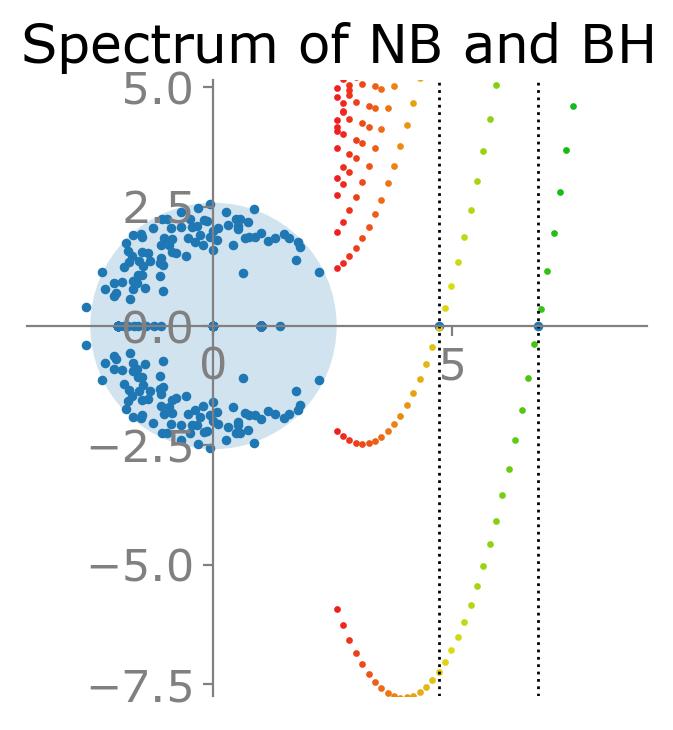

In [13]:
d = hsbm.H.sum() / hsbm.n
fig = plt.figure(figsize=(4, 4))
widths = [5]
heights = [5]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# plot_spectral_NB(hsbm, d, fig, ax)
scatter_spectral(eig_NB, fig=fig, ax=ax, title=r"Spectrum of $\mathrm{NB}$ and $\mathrm{BH}$")
bulk = np.sqrt(d * (k - 1))
ax.add_patch(Circle(xy = (0.0, 0.0), radius=bulk, alpha=0.2))

bh_samples = 40
c = gen_colors(start=colors_red[0], end=colors_green[0], n=bh_samples)
i = 0
for r in np.linspace(bulk, max(info_eig).real+1, bh_samples):
    BH = hsbm.get_operator('BH', r=r)
    eig_BH, _ = eig(BH.toarray())
    x = []
    y = []
    for _w in eig_BH:
        _y = _w.real if isinstance(_w, complex) else _w
        x.append(r)
        y.append(_y)
    ax.scatter(x, y, s=2, c=c[i])
    i += 1
ax.set_ylim(-3 * bulk, 2 * bulk)
ax.set_xlim(-bulk, 3 * bulk)
for e in info_eig:
    ax.axvline(e.real, c='black', ls=':', lw=1)
save_path = "./_Figure/Hyper/" + "uniformNBBHspectrum.pdf"
plt.savefig(save_path, dpi=600)

# NonUniformSymmetricHSBM

Generating hyper edges for order 2...


4950it [00:00, 40901.74it/s]


Generating hyper edges for order 3...


161700it [00:03, 41622.76it/s]


Generating hyper edges for order 4...


3921225it [01:38, 39776.84it/s]


# of nodes 100, # of edges 622


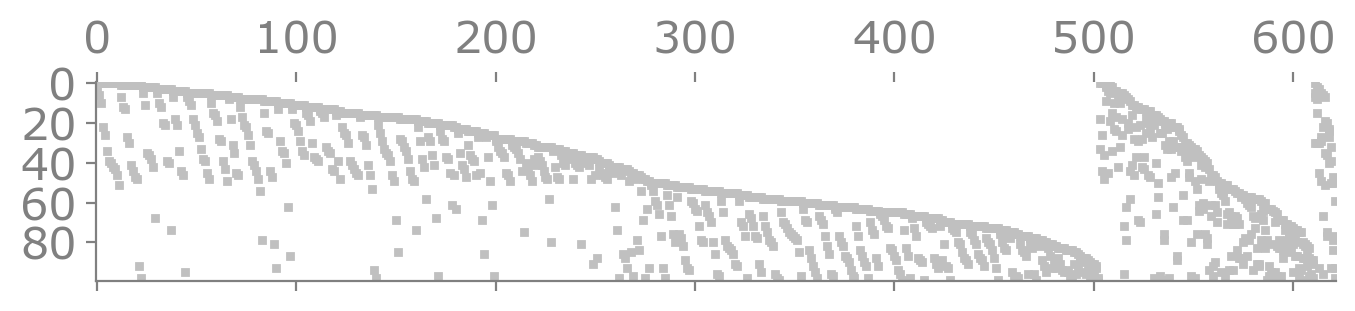

In [14]:
n = 100
q = 2
Ks = [2, 3, 4]
cin = 20
cout = 2
hsbm = UnUniformSymmetricHSBM(n, q, Ks, cin, cout)
print(f'# of nodes {hsbm.n}, # of edges {hsbm.e}')
fig = plt.figure(figsize=(8, 8))
widths = [4]
heights = [4]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
plt.spy(hsbm.H, markersize=2, rasterized=True, color=gray)

In [19]:
edge_order, edge_count = np.unique(hsbm.H.sum(axis=0).flatten(), return_counts=True)
order_count = dict(zip(edge_order, edge_count))
print(order_count)
ds = dict()
for o in order_count:
    ds[o] = o * order_count[o] / n

{2: 503, 3: 108, 4: 11}


Text(0, 0.5, '# of HyperEdges')

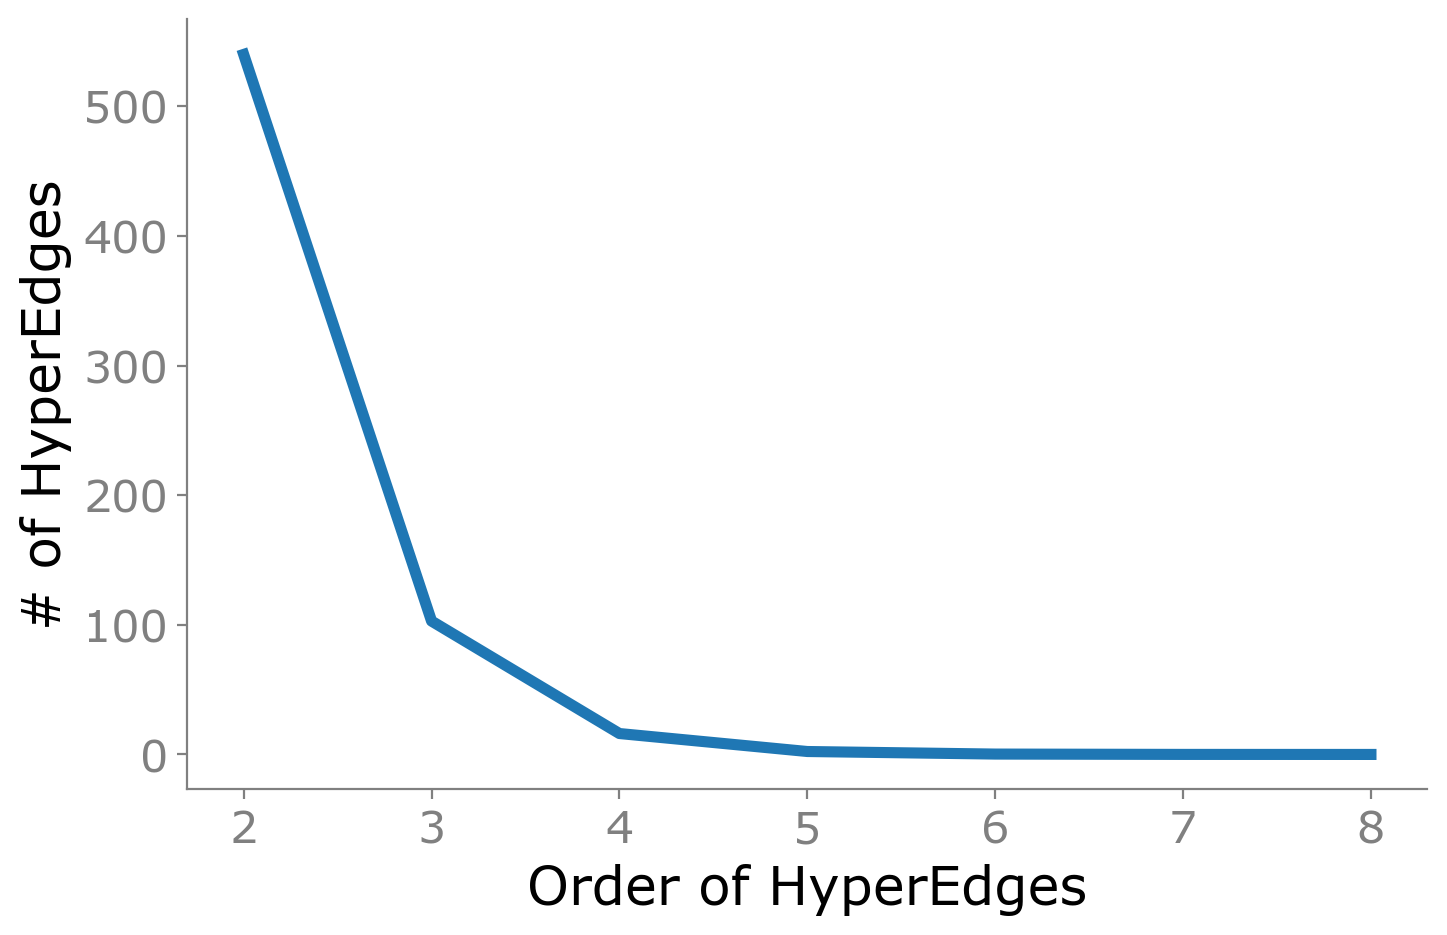

In [13]:
K = [2, 3, 4, 5, 6, 7, 8]
mk = []
cin = 20
cout = 2
n = 100
q = 2
for k in K:
    temp = q * comb(int(n/q), k) * cin / (n**(k-1)) + (comb(n, k) - q * comb(int(n/q), k)) * cout / (n**(k-1))
    mk.append(temp)
plt.plot(K, mk)
plt.xlabel("Order of HyperEdges")
plt.ylabel("# of HyperEdges")

# Nonbacktracking 

In [15]:
d = hsbm.H.sum() / hsbm.n
print(f'HyperGraph, d={d}')
NB = hsbm.get_operator('NB')
print(np.shape(NB))
eig_NB, eigv_NB = eig(NB.toarray())
info_eig = []
for e in eig_NB:
    if abs(e) > np.sqrt(d) and e.imag == 0:
        info_eig.append(e)
print(info_eig)

HyperGraph, d=13.74
Non-backtrack constructing for 1374 directed node-hyperEdge pairs...


1887876it [20:10, 1559.28it/s]


(1374, 1374)
[(17.42884263041331+0j), (12.337233094453136+0j)]


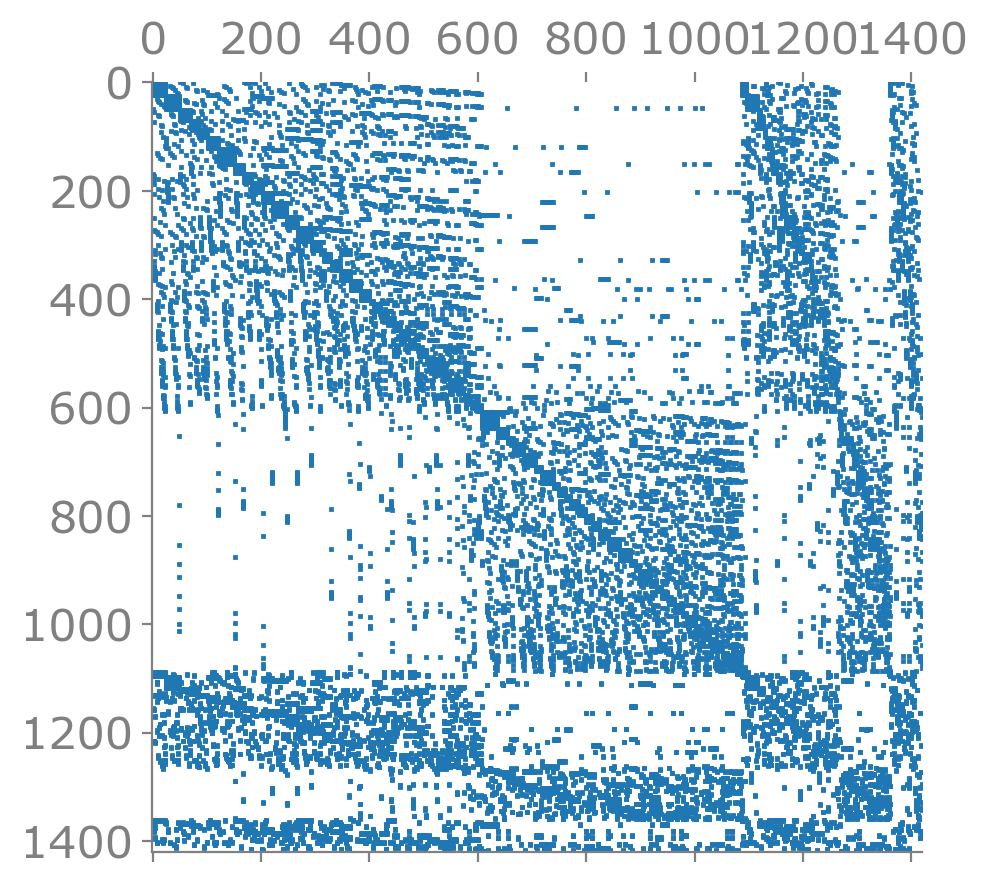

In [11]:
plt.spy(NB, markersize=1)

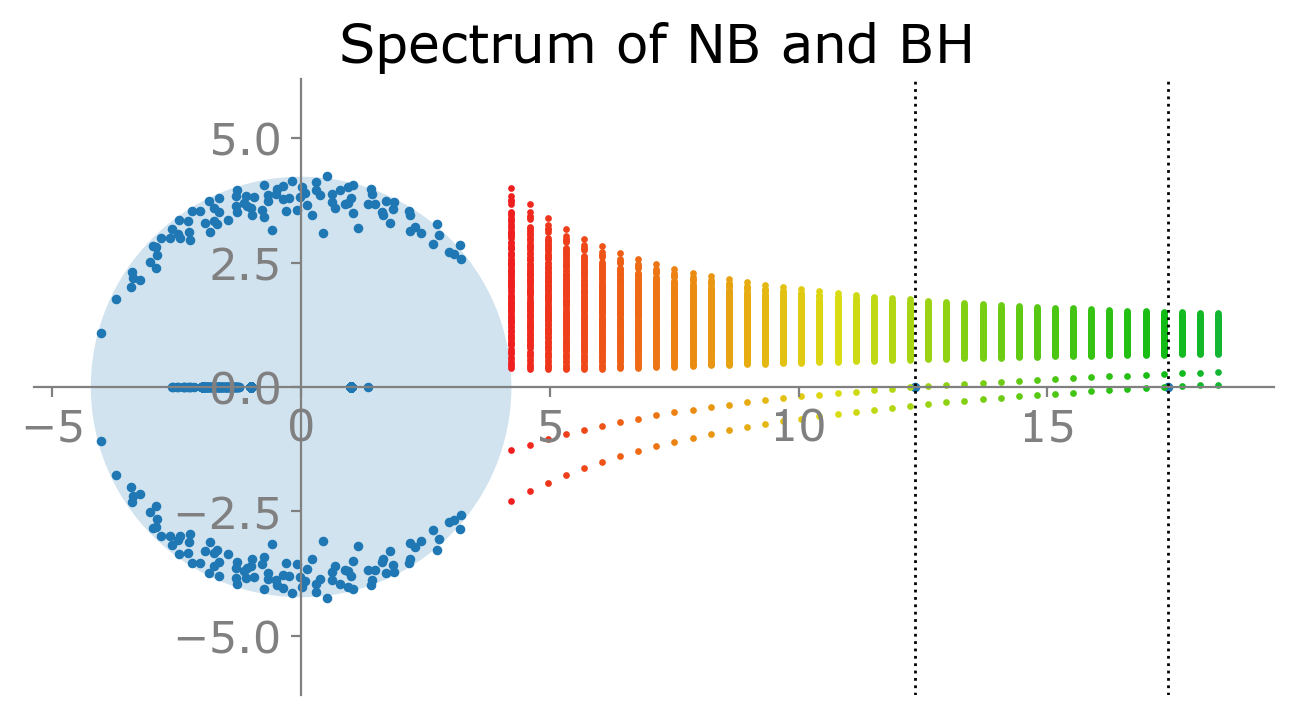

In [20]:
fig = plt.figure(figsize=(8, 4))
widths = [5]
heights = [5]
spec5 = fig.add_gridspec(ncols=1, nrows=1, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
# plot_spectral_NB(hsbm, d, fig, ax)
scatter_spectral(eig_NB, fig=fig, ax=ax, title=r"Spectrum of $\mathrm{NB}$ and $\mathrm{BH}$")
bulk = 0
for k in Ks:
    bulk += ds[k] * (k - 1)
bulk = np.sqrt(bulk)
ax.add_patch(Circle(xy = (0.0, 0.0), radius=bulk, alpha=0.2))

bh_samples = 40
c = gen_colors(start=colors_red[0], end=colors_green[0], n=bh_samples)
i = 0
for r in np.linspace(bulk, max(info_eig).real+1, bh_samples):
    BH = hsbm.get_operator('BH', r=r)
    eig_BH, _ = eig(BH.toarray())
    x = []
    y = []
    for _w in eig_BH:
        _y = _w.real if isinstance(_w, complex) else _w
        x.append(r)
        y.append(_y)
    ax.scatter(x, y, s=2, c=c[i])
    i += 1
ax.set_ylim(-1 * bulk, 1 * bulk)
# ax.set_xlim(-bulk, 3 * bulk)
for e in info_eig:
    ax.axvline(e.real, c='black', ls=':', lw=1)
save_path = "./_Figure/Hyper/" + "nonuniformNBBHspectrum.pdf"
plt.savefig(save_path, dpi=600)

In [17]:
BH_Partition, BH_NumGroup = HyperCommunityDetect().BetheHessian(hsbm)
confusionMatrix, _ = get_confusionmatrix(hsbm.groupId, BH_Partition, hsbm.q, BH_NumGroup)
np.set_printoptions(suppress = True)
print(f'epsilon is {cout/cin}, AMI is {adjusted_mutual_info_score(hsbm.groupId, BH_Partition)}, Confusion Matrix is\n {confusionMatrix}')

number of groups = 2, Kpos=2, Kneg=0
True index is [0 1], Community detected index is [0 1]
epsilon is 0.1, AMI is 1.0, Confusion Matrix is
 [[50.  0.]
 [ 0. 50.]]


D:\BackProgram\Anaconda\envs\network\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
a = 0
b = 0
for k in Ks:
    a += q*comb(n/q, k)*k/(n**(k-1))
    b += (comb(n, k)-q*comb(n/q, k))*k/(n**(k-1))
d_theory = (a * cin + b * cout) / n
print(f'd_theory is {d_theory}')

d_theory is 14.53233


# EXP show AMI-Epsilon q=2

In [6]:
n = 100
q = 2
d = 15
Ks = (2, 3)
fileId = 'amiExpHyper24.5.23' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH'
load_path = "./result/detectabilityHyper/" + fileId + ".txt"

add_fileId1 = 'amiExpHyper24.5.30' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH'
addStrId = f'_40more0.4~0.8'
add_fileId2 = 'amiExpHyper24.5.30' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH' + addStrId
add_paths = ["./result/detectabilityHyper/" + add_fileId + ".txt" for add_fileId in [add_fileId1, add_fileId2]]
epsilons, results = read_exp(load_path=load_path, add_paths=add_paths)

Additional result adding...


In [6]:
def get_phi(n, q, Ks, d):
    phi_1s = []
    phi_2s = []
    for e in epsilons:
        temp = 0
        for k in Ks:
            temp += q * comb(int(n/q), k) * k / (n**k) + e * (comb(n, k) - q * comb(int(n/q), k)) * k / (n**k)
        cin = d / temp
        cout = e * cin
        alphas = dict()
        betas = dict()
        for k in Ks:
            c_kin = (cin + (2**(k-2)-1)*cout) / (2**(k-2) * np.math.factorial(k - 2))
            c_kout = cout / np.math.factorial(k - 2)
            alphas[k] = (c_kin + c_kout) / 2
            betas[k] = (c_kin - c_kout) / 2
        phi_1 = np.sum([betas[k] for k in betas.keys()]) ** 2 / np.sum([alphas[k] for k in alphas.keys()])
        phi_2 = np.sum([betas[k]**2/alphas[k] for k in Ks])
        phi_1s.append(phi_1)
        phi_2s.append(phi_2)
    print(phi_1s)
    print(phi_2s)
    return phi_1s, phi_2s

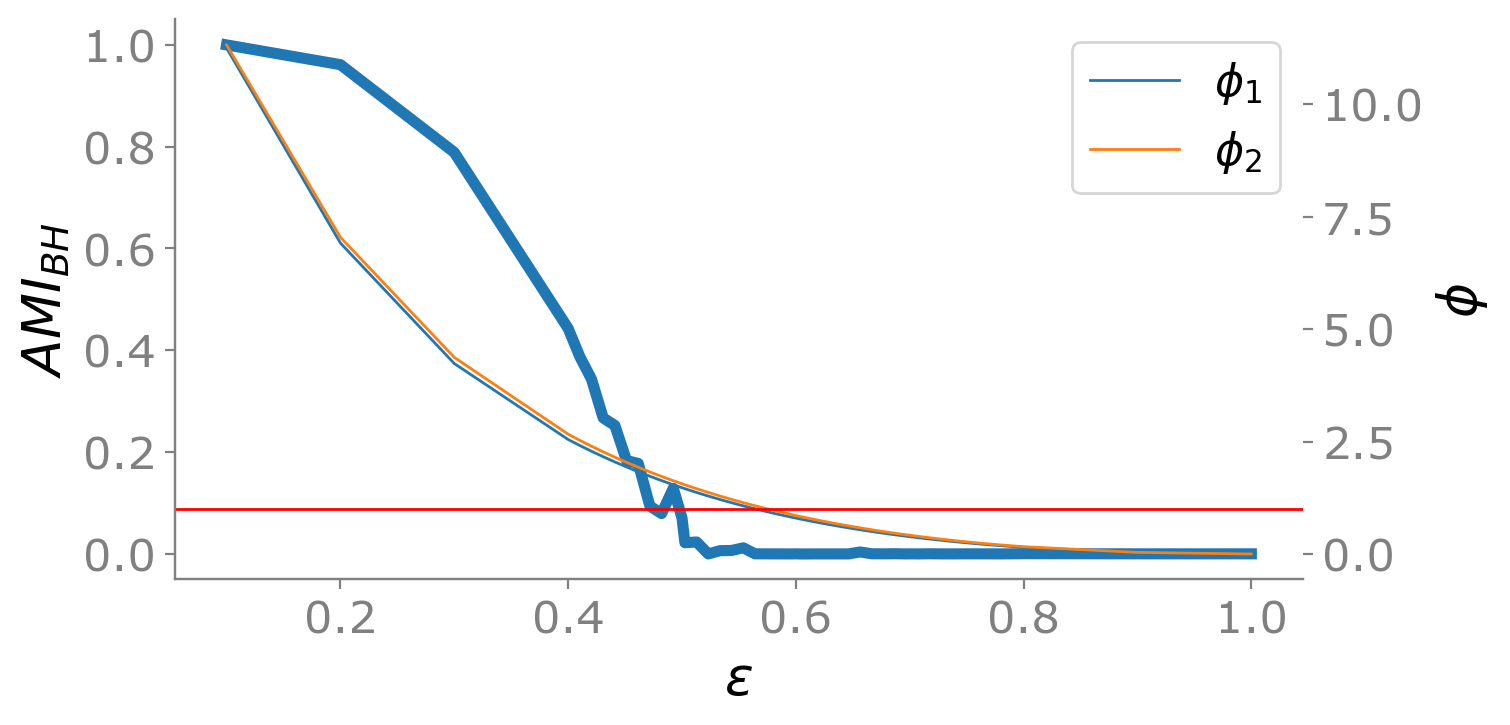

In [7]:
fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = np.size(np.where(epsilons <= 1))
plt.plot(epsilons[:select_number], results[0][:select_number], label=r'$AMI_{BH}$')
# plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r'$AMI_{BH}$')

ax_twin = ax.twinx()
ax_twin.plot(epsilons[:select_number], phi_1s[:select_number], linewidth=1, label=r'$\phi_1$')
ax_twin.plot(epsilons[:select_number], phi_2s[:select_number], linewidth=1, label=r'$\phi_2$')
ax_twin.set_ylabel(r'$\phi$')
ax_twin.axhline(1, color='red', lw=1)
plt.legend()

# Uniform Test

In [4]:
n = 100
q = 2
d = 15
Ks = (3, )
fileId = 'amiExpHyper24.5.24' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH'
load_path = "./result/detectabilityHyper/" + fileId + ".txt"
epsilons, results = read_exp(load_path=load_path)

Text(0, 0.5, 'AMI_BH')

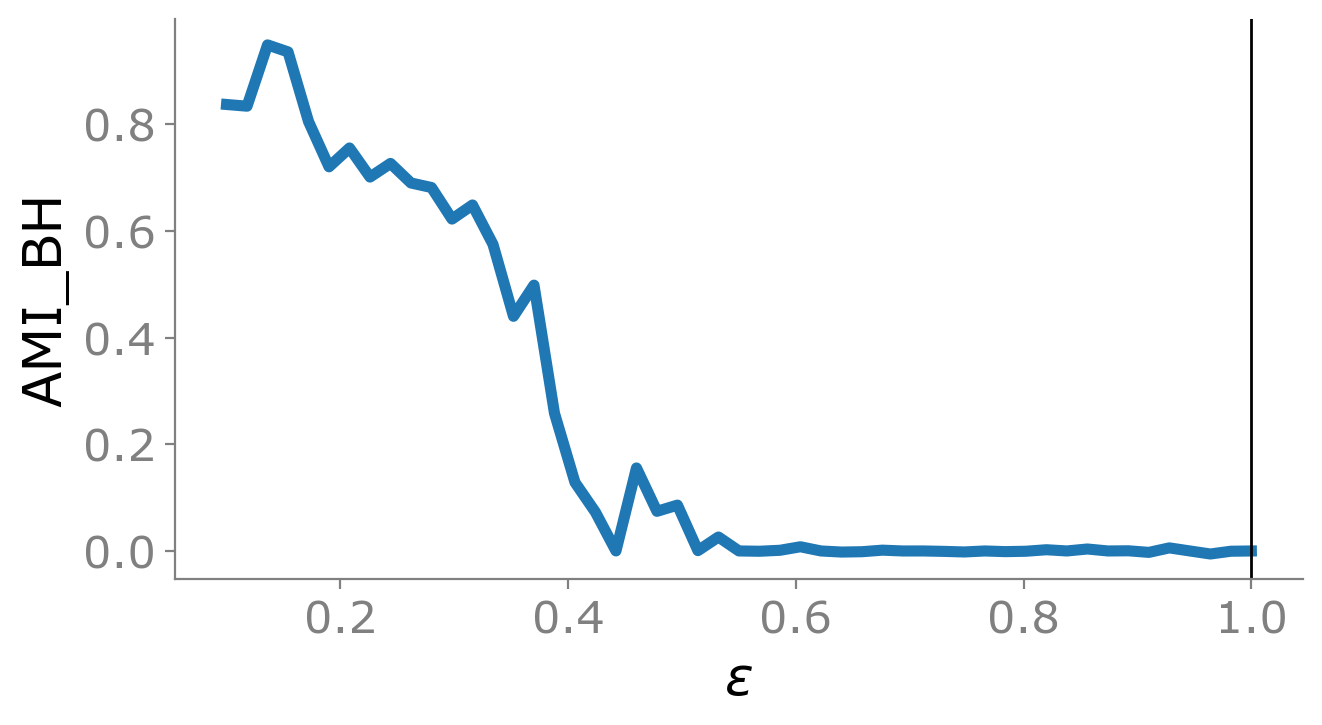

In [8]:
fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = 51
plt.plot(epsilons[:select_number], results[0][:select_number])
plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\epsilon$")
plt.ylabel("AMI_BH")

In [9]:
# SNR from paper "Spectral Detection on Sparse Hypergraphs"
e = (np.sqrt(d * (Ks[0] - 1)) - 1) / (np.sqrt(d * (Ks[0] - 1)) + q - 1)
crit_epsilon = e / (q**(Ks[0] - 2) - (q**(Ks[0] - 2) - 1) * e)
print(crit_epsilon)

0.5281475095139693


Text(0, 0.5, 'AMI_BH')

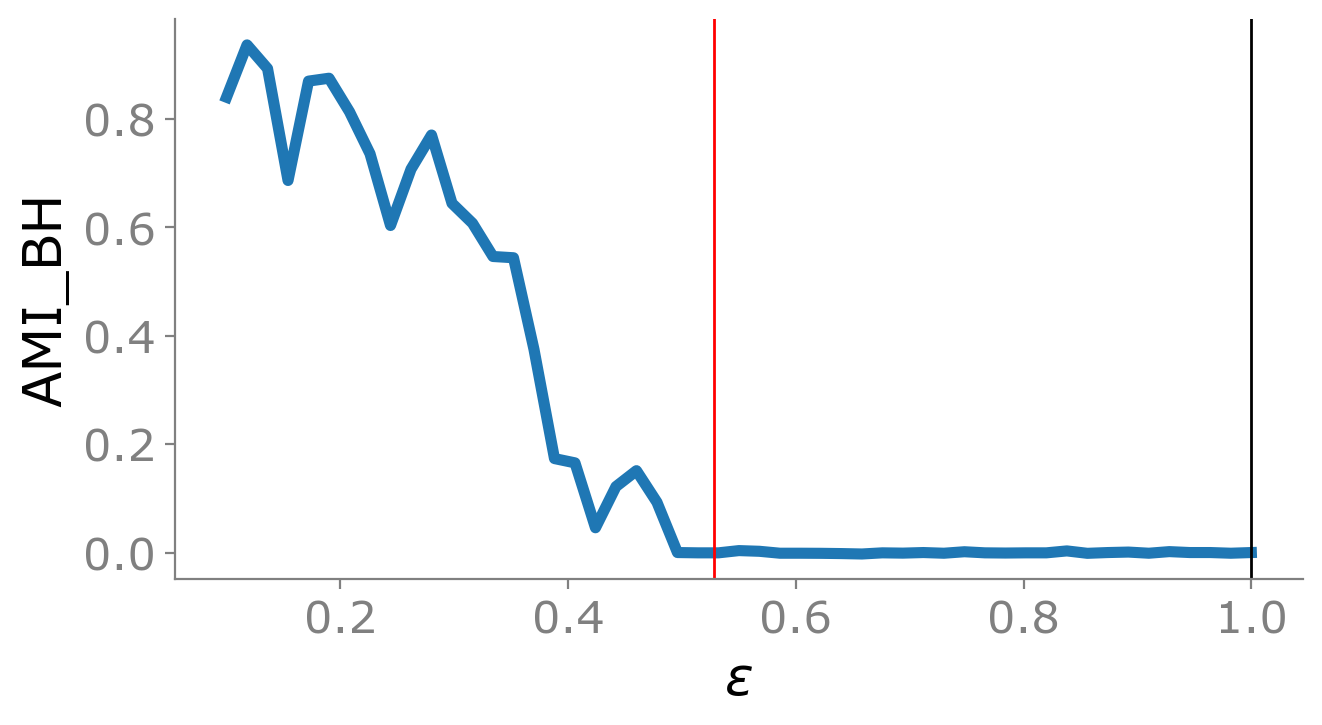

In [11]:
n = 100
q = 2
d = 15
Ks = (3, )
addtionTag = "_uniform"
fileId = 'amiExpHyper24.5.24' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH{addtionTag}'
load_path = "./result/detectabilityHyper/" + fileId + ".txt"
epsilons, results = read_exp(load_path=load_path)
fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = 51
plt.plot(epsilons[:select_number], results[0][:select_number])
plt.axvline(1, color='k', lw=1)
plt.axvline(crit_epsilon, color='red', lw=1)
plt.xlabel(r"$\epsilon$")
plt.ylabel("AMI_BH")

# Weighted Bethe Hessian of projection of Bipartite, in NonUniform

In [4]:
n = 100
q = 2
d = 15
Ks = (2, 3)
bipartite = True
addStrId = f'_0.4~0.8'
fileId = 'amiExpHyper24.5.30' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH{"_bi" if bipartite else ""}' + addStrId
load_path = "./result/detectabilityHyper/" + fileId + ".txt"

addStrId = f'_0.4~0.8_40more'
add_fileId = 'amiExpHyper24.5.31' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH{"_bi" if bipartite else ""}' + addStrId
add_load_path = ["./result/detectabilityHyper/" + add_fileId + ".txt"]
epsilons, results = read_exp(load_path=load_path, add_paths=add_load_path)

Additional result adding...


In [7]:
phi_1s, phi_2s = get_phi(n, q, Ks, d)

[11.248958429775021, 8.92770911213221, 7.092328268150662, 5.6310613388062984, 4.461574444560801, 3.521476586778744, 2.763992059248051, 2.15293042825876, 1.6601517426255659, 1.263560146069017, 0.9457103075845017, 0.692488861679125, 0.4927202634127974, 0.3372902856932745, 0.21876911136431537, 0.13106524202993527, 0.06916869209769466, 0.02889581880223065, 0.006802858558969138, 0.0]
[11.318882025298098, 9.031869789931152, 7.218644086981773, 5.76789070495641, 4.599504629365831, 3.653615816468337, 2.8857087752077595, 2.261435736841359, 1.754079365121226, 1.3426012400382248, 1.0103194040542771, 0.743642071488497, 0.5317467391870391, 0.3657355930692722, 0.2382965689894099, 0.14338414629975135, 0.07598400514017098, 0.031869024128997954, 0.007531338552763868, 0.0]


D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


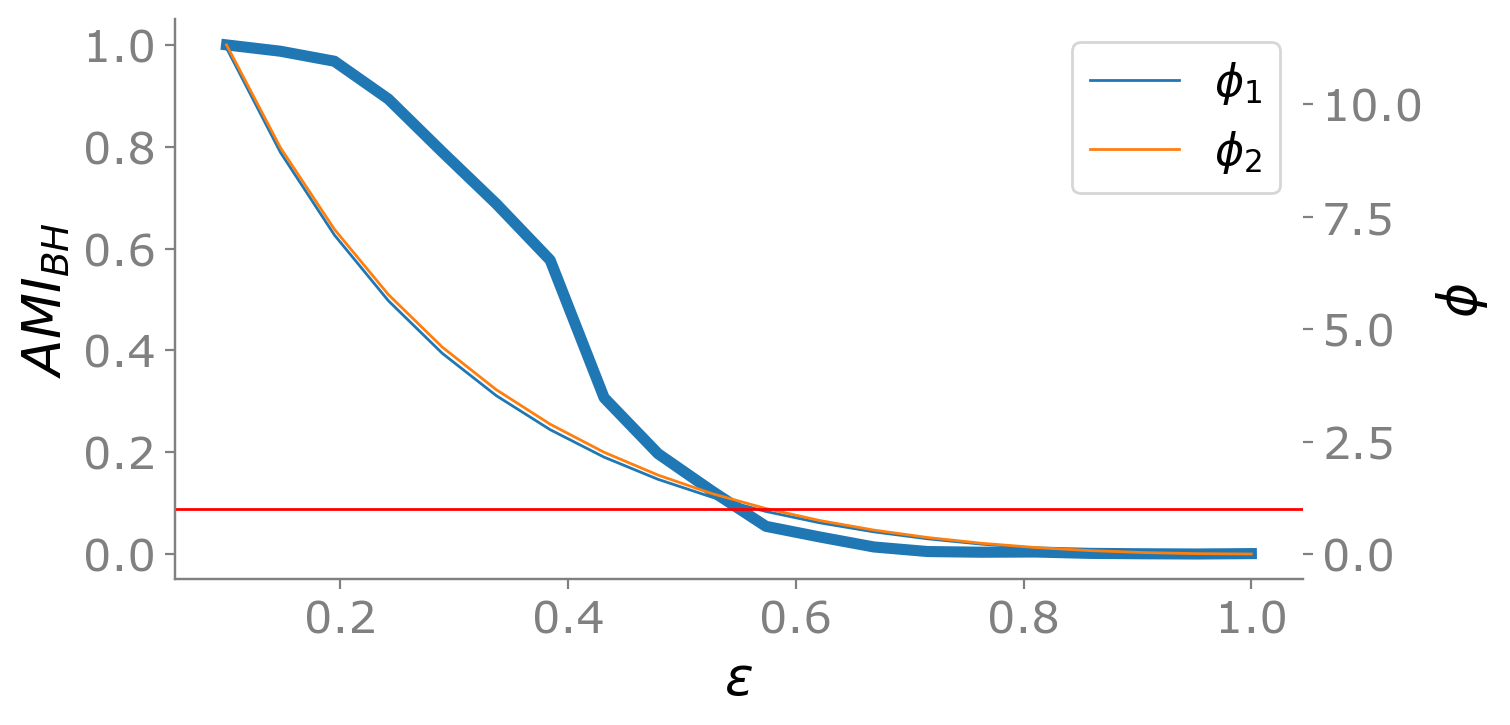

In [8]:
fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = np.size(np.where(epsilons <= 1))
plt.plot(epsilons[:select_number], results[0][:select_number], label=r'$AMI_{BH}$')
# plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r'$AMI_{BH}$')

ax_twin = ax.twinx()
ax_twin.plot(epsilons[:select_number], phi_1s[:select_number], linewidth=1, label=r'$\phi_1$')
ax_twin.plot(epsilons[:select_number], phi_2s[:select_number], linewidth=1, label=r'$\phi_2$')
ax_twin.set_ylabel(r'$\phi$')
ax_twin.axhline(1, color='red', lw=1)
plt.legend()

# q=3 case

In [4]:
n = 150
q = 3
d = 15
Ks = (2, 3)
bipartite = False
addStrId = f'_higher_q'
fileId = 'amiExpHyper24.6.5' + f'_n={n}_q={q}_d={round(d)}_Ks={Ks}BH{"_bi" if bipartite else ""}' + addStrId
load_path = "./result/detectabilityHyper/" + fileId + ".txt"
epsilons, results = read_exp(load_path=load_path)

In [5]:
phi_1s = []
phi_2s = []
for e in epsilons:
    temp = 0
    for k in Ks:
        temp += q * comb(int(n/q), k) * k / (n**k) + e * (comb(n, k) - q * comb(int(n/q), k)) * k / (n**k)
    cin = d / temp
    cout = e * cin
    alphas = dict()
    betas = dict()
    for k in Ks:
        c_kin = (cin + (q**(k-2)-1)*cout) / (q**(k-2) * np.math.factorial(k - 2))
        c_kout = cout / np.math.factorial(k - 2)
        alphas[k] = (c_kin + (q-1) * c_kout) / q
        betas[k] = (c_kin - c_kout) / q
    phi_1 = np.sum([betas[k] for k in betas.keys()]) ** 2 / np.sum([alphas[k] for k in alphas.keys()])
    phi_2 = np.sum([betas[k]**2/alphas[k] for k in Ks])
    phi_1s.append(phi_1)
    phi_2s.append(phi_2)
print(phi_1s)
print(phi_2s)

[8.1736445372809, 7.108343491606575, 6.202113772505304, 5.426824015849771, 4.760158520924451, 4.184246312632938, 3.684651042228136, 3.249617427311189, 2.869502609067474, 2.5363425001761346, 2.243517835966796, 1.9854946675613225, 1.7576209978413055, 1.5559661577360695, 1.3771930055028005, 1.2184555399111883, 1.0773163422227947, 0.9516796012009292, 0.8397364678887193, 0.7399202287185369, 0.6508693444877874, 0.5713968271603957, 0.5004647510566286, 0.4371629449608238, 0.3806911054242441, 0.3303437226434104, 0.28549732883374074, 0.24559967253376988, 0.21016049644417895, 0.17874365553118501, 0.15096035948693615, 0.1264633617574793, 0.10494194816343821, 0.08611760315573166, 0.06974025214271158, 0.05558499501587875, 0.04344925971312223, 0.033150315963949004, 0.02452309871539836, 0.01741829850318753, 0.011700682500810255, 0.007247615383546837, 0.00394775367332998, 0.0016998910369845279, 0.0004119352187928692, 0.0]
[8.429070929070928, 7.392630435066151, 6.504494245715229, 5.73841199762105, 5.073

D:\BackProgram\Anaconda\envs\network\Lib\site-packages\matplotlib_inline\config.py:68: DeprecationWarning: InlineBackend._figure_format_changed is deprecated in traitlets 4.1: use @observe and @unobserve instead.
  def _figure_format_changed(self, name, old, new):


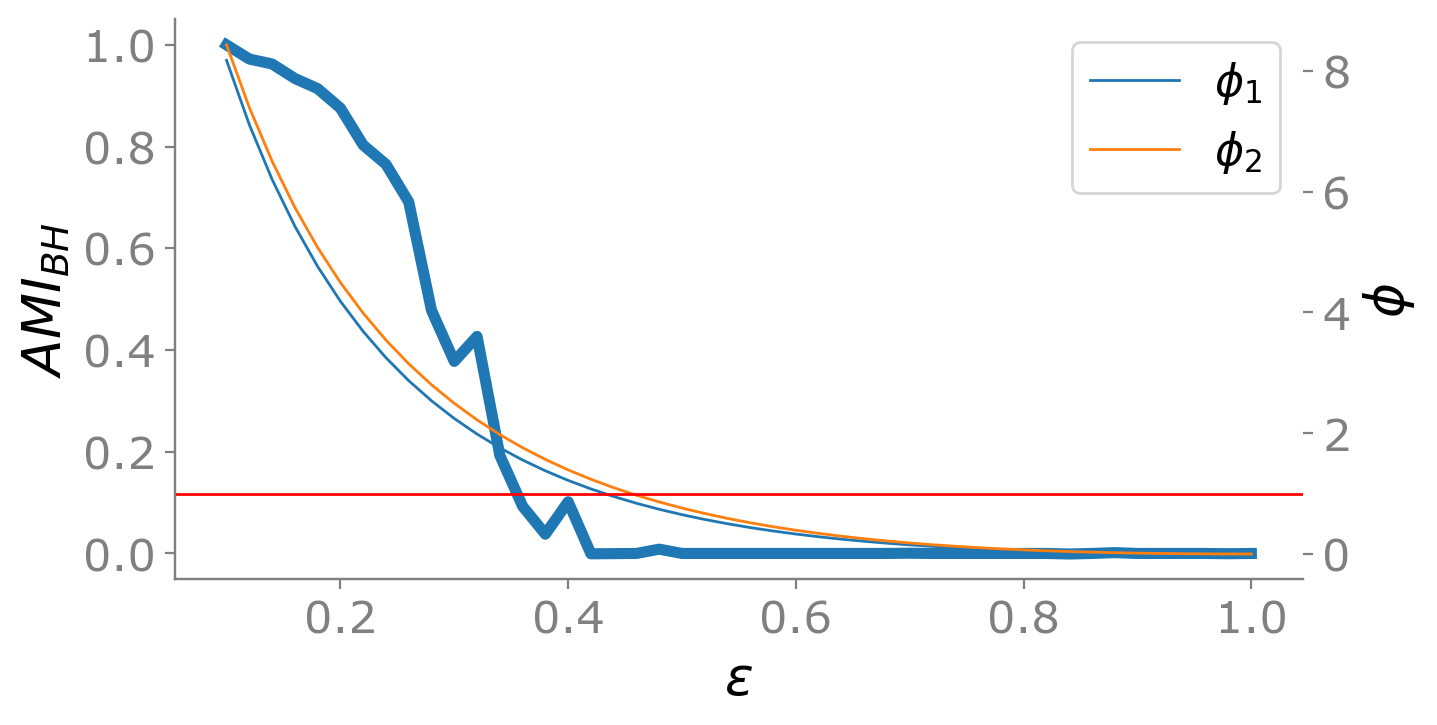

In [6]:
fig = plt.figure(figsize=(16, 8))
widths = [4, 4]
heights = [4, 4]
spec5 = fig.add_gridspec(ncols=2, nrows=2, width_ratios=widths, height_ratios=heights)
row = 0
col = 0
ax = fig.add_subplot(spec5[row, col])
select_number = np.size(np.where(epsilons <= 1))
plt.plot(epsilons[:select_number], results[0][:select_number], label=r'$AMI_{BH}$')
# plt.axvline(1, color='k', lw=1)
plt.xlabel(r"$\epsilon$")
plt.ylabel(r'$AMI_{BH}$')

ax_twin = ax.twinx()
ax_twin.plot(epsilons[:select_number], phi_1s[:select_number], linewidth=1, label=r'$\phi_1$')
ax_twin.plot(epsilons[:select_number], phi_2s[:select_number], linewidth=1, label=r'$\phi_2$')
ax_twin.set_ylabel(r'$\phi$')
ax_twin.axhline(1, color='red', lw=1)
plt.legend()